                                            WALMART CASE STUDY

About Walmart

Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.


Business Problem

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).



In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [145]:
df=pd.read_csv('walmart_data.csv')
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [146]:
df.shape

(550068, 10)

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [148]:
df.isnull().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category,0
Purchase,0


In [149]:
df.nunique()

,0
User_ID,5891
Product_ID,3631
Gender,2
Age,7
Occupation,21
City_Category,3
Stay_In_Current_City_Years,5
Marital_Status,2
Product_Category,20
Purchase,18105


In [150]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [151]:
df.Gender.value_counts()

,count
Gender,
M,414259
F,135809


In [152]:
df.Age.value_counts()

,count
Age,
26-35,219587
36-45,110013
18-25,99660
46-50,45701
51-55,38501
55+,21504
0-17,15102


In [153]:
df.City_Category.value_counts()

,count
City_Category,
B,231173
C,171175
A,147720


In [154]:
df.Marital_Status.value_counts()

,count
Marital_Status,
0,324731
1,225337


In [155]:
df.Product_Category.value_counts()

,count
Product_Category,
5,150933
1,140378
8,113925
11,24287
2,23864
6,20466
3,20213
4,11753
16,9828


In [156]:
df.Occupation.value_counts()

,count
Occupation,
4,72308
0,69638
7,59133
1,47426
17,40043
20,33562
12,31179
14,27309
2,26588


In [157]:
df.Purchase.describe()

,Purchase
count,550068.000000
mean,9263.968713
std,5023.065394
min,12.000000
25%,5823.000000
50%,8047.000000
75%,12054.000000
max,23961.000000


In [158]:
df_copy=df[['User_ID','Gender','Age','Occupation','City_Category','Marital_Status','Stay_In_Current_City_Years','Product_Category','Purchase']]
df_copy['Gender'].replace({'F':0,'M':1},inplace=True)
df_copy['Age'].replace({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7},inplace=True)
df_copy['City_Category'].replace({'A':1,'B':2,'C':3},inplace=True)
df_copy['Stay_In_Current_City_Years'].replace({'4+':4},inplace=True)


/tmp/ipython-input-158-1984367804.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy['Gender'].replace({'F':0,'M':1},inplace=True)
/tmp/ipython-input-158-1984367804.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_copy['Gender'].replace({'F':0,'M':1},inplace=True)
/tmp/ipython-input-1

In [159]:
df_copy.corr()

,User_ID,Gender,Age,Occupation,City_Category,Marital_Status,Stay_In_Current_City_Years,Product_Category,Purchase
User_ID,1.000000,-0.033474,0.032698,-0.023971,0.022859,0.020443,-0.030737,0.003825,0.004716
Gender,-0.033474,1.000000,-0.004262,0.117291,-0.004515,-0.011603,0.014660,-0.045594,0.060346
Age,0.032698,-0.004262,1.000000,0.091463,0.123079,0.311738,-0.004712,0.061197,0.015839
Occupation,-0.023971,0.117291,0.091463,1.000000,0.034479,0.024280,0.030005,-0.007618,0.020833
City_Category,0.022859,-0.004515,0.123079,0.034479,1.000000,0.039790,0.019946,-0.014364,0.061914
Marital_Status,0.020443,-0.011603,0.311738,0.024280,0.039790,1.000000,-0.012819,0.019888,-0.000463
Stay_In_Current_City_Years,-0.030737,0.014660,-0.004712,0.030005,0.019946,-0.012819,1.000000,-0.004213,0.005422
Product_Category,0.003825,-0.045594,0.061197,-0.007618,-0.014364,0.019888,-0.004213,1.000000,-0.343703
Purchase,0.004716,0.060346,0.015839,0.020833,0.061914,-0.000463,0.005422,-0.343703,1.000000


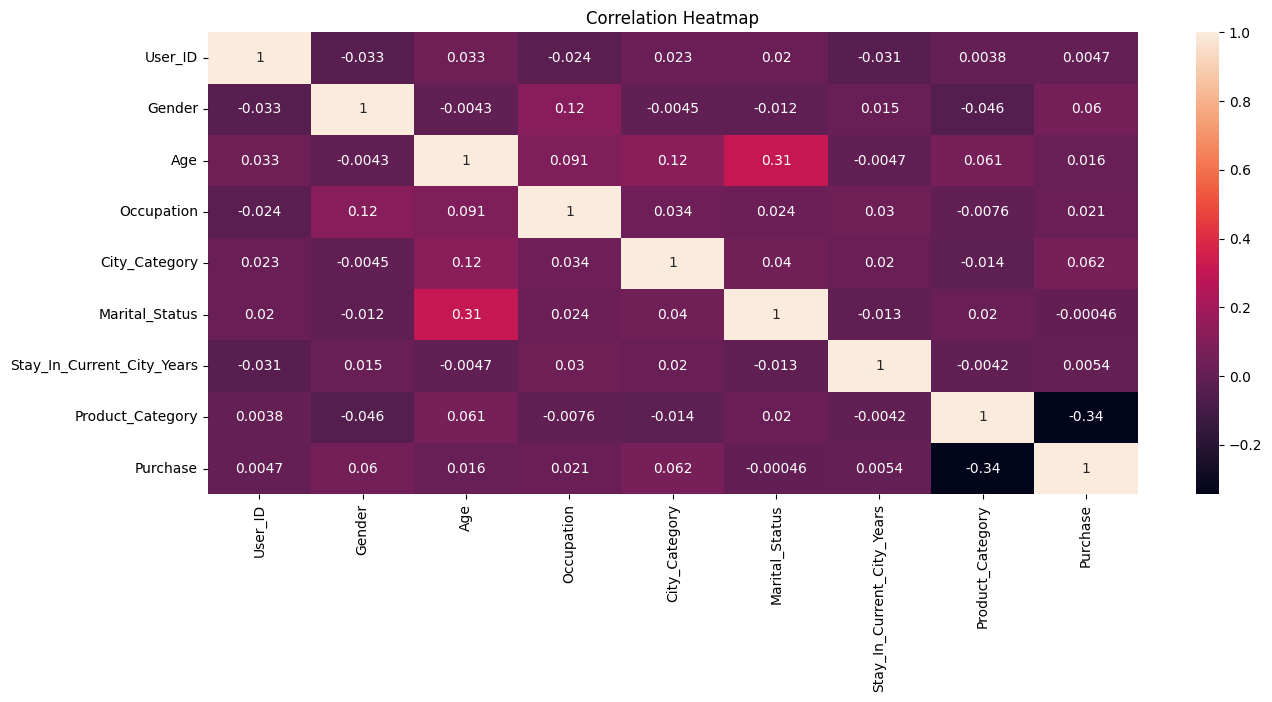

In [160]:
plt.figure(figsize=(15,6))
sns.heatmap(df_copy.corr(),annot=True)
plt.title('Correlation Heatmap')
plt.show()

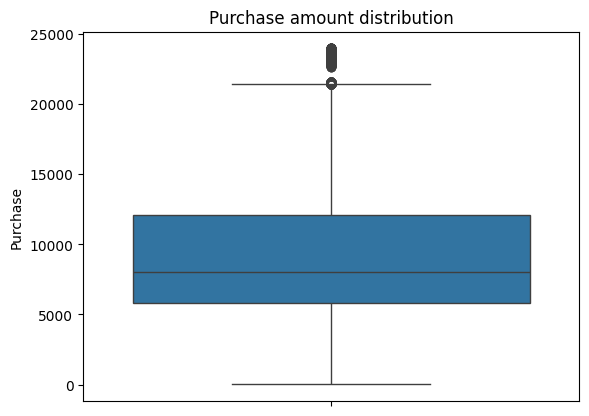

In [161]:
sns.boxplot(df.Purchase)
plt.title('Purchase amount distribution')
plt.show()

In [162]:
q1=df.Purchase.quantile(0.25)
q3=df.Purchase.quantile(0.75)
iqr=q3-q1
lower_bound=q1-(1.5*iqr)
upper_bound=q3+(1.5*iqr)
outliers=df[(df.Purchase<lower_bound) | (df.Purchase>upper_bound)]
len(outliers)

2677

The above box plot specifies that the mean value for all the purchases made during the Black Friday sale is around 9000 with 2677 outliers.

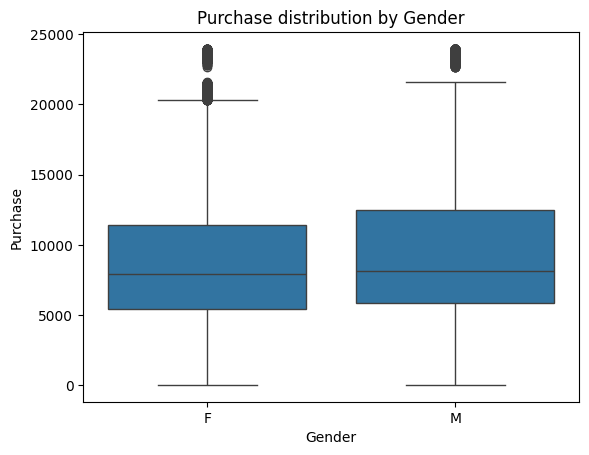

In [163]:
sns.boxplot(x='Gender',y='Purchase',data=df)
plt.title('Purchase distribution by Gender')
plt.show()

In [164]:
def outliers(x):
  q1=df.Purchase.quantile(0.25)
  q3=df.Purchase.quantile(0.75)
  iqr=q3-q1
  lower=q1-(1.5*iqr)
  upper=q3+(1.5*iqr)
  return (x < lower) | (x > upper)

df['gender_outliers']= df.groupby('Gender')['Purchase'].transform(outliers)
df['gender_outliers'].value_counts()

,count
gender_outliers,
False,547391
True,2677


In [165]:
df.groupby('Gender')['gender_outliers'].sum()

,gender_outliers
Gender,
F,589
M,2088


The mean is almost same for both genders but females have 589 outliers and males have 2088 outliers

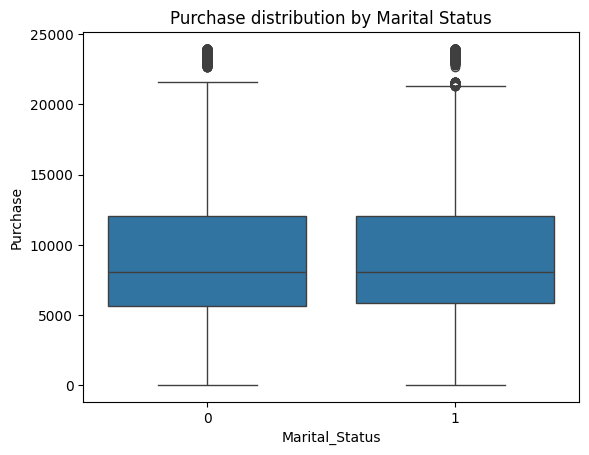

In [166]:
sns.boxplot(x='Marital_Status',y='Purchase',data=df)
plt.title('Purchase distribution by Marital Status')
plt.show()

In [167]:
df['maritalstatus_outliers']=df.groupby('Marital_Status')['Purchase'].transform(outliers)
df.groupby('Marital_Status')['maritalstatus_outliers'].sum()

,maritalstatus_outliers
Marital_Status,
0,1489
1,1188


The mean is almost same regardless of marital status and there are 1489 outliers for unmarried customers and 1188 outliers for married customers

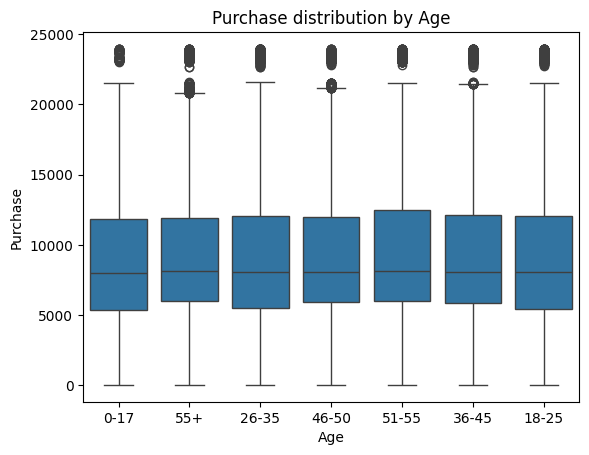

In [168]:
sns.boxplot(x='Age',y='Purchase',data=df)
plt.title('Purchase distribution by Age')
plt.show()

In [169]:
df['Age_outliers']=df.groupby('Age')['Purchase'].transform(outliers)
df.groupby('Age')['Age_outliers'].sum()

,Age_outliers
Age,
0-17,70
18-25,326
26-35,926
36-45,604
46-50,259
51-55,310
55+,182


The means are same regardless of age and the highest outliers(926) are observed in age  group of 26-35 followed by age group 36-45

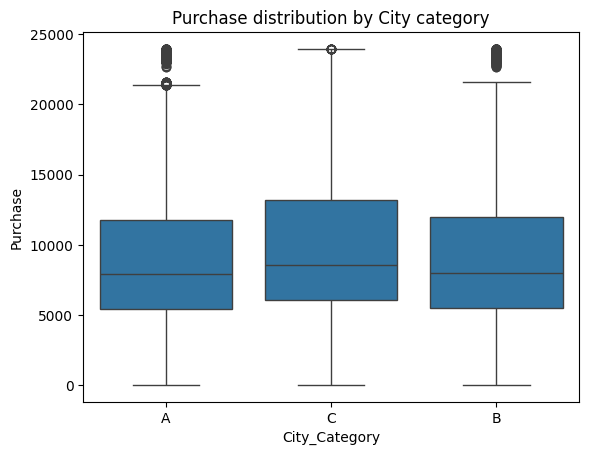

In [170]:
sns.boxplot(x='City_Category',y='Purchase',data=df)
plt.title('Purchase distribution by City category')
plt.show()

In [171]:
df['City-outliers']=df.groupby('City_Category')['Purchase'].transform(outliers)
df.groupby('City_Category')['City-outliers'].sum()

,City-outliers
City_Category,
A,684
B,1059
C,934


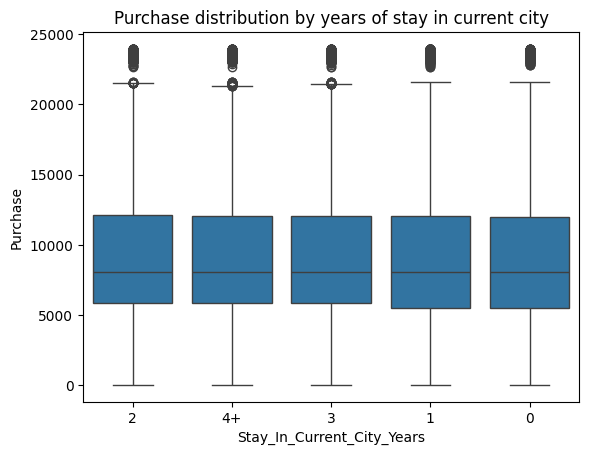

In [172]:
sns.boxplot(x='Stay_In_Current_City_Years',y='Purchase',data=df)
plt.title('Purchase distribution by years of stay in current city')
plt.show()

In [173]:
df['scc_outliers']=df.groupby('Stay_In_Current_City_Years')['Purchase'].transform(outliers)
df.groupby('Stay_In_Current_City_Years')['scc_outliers'].sum()

,scc_outliers
Stay_In_Current_City_Years,
0,362
1,976
2,454
3,481
4+,404


Text(0.5, 1.0, 'Gender Distribution')

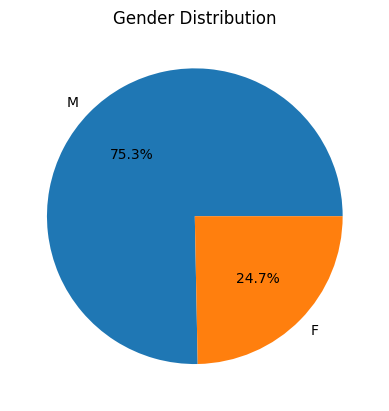

In [174]:
plt.pie(df['Gender'].value_counts().values,labels=df['Gender'].value_counts().index,autopct='%1.1f%%')
plt.title('Gender Distribution')

75.3% of customers of Black friday sale are male and 24.7% are female customers

Text(0.5, 1.0, 'Purchase Distribution by Gender')

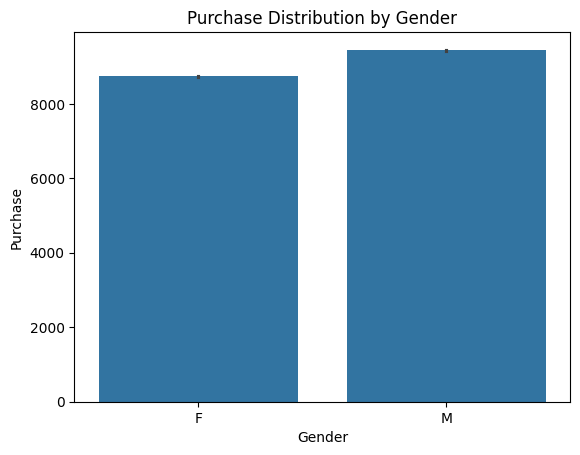

In [175]:
sns.barplot(x=df['Gender'],y=df['Purchase'])
plt.title('Purchase Distribution by Gender')

Text(0.5, 1.0, 'Age Distribution')

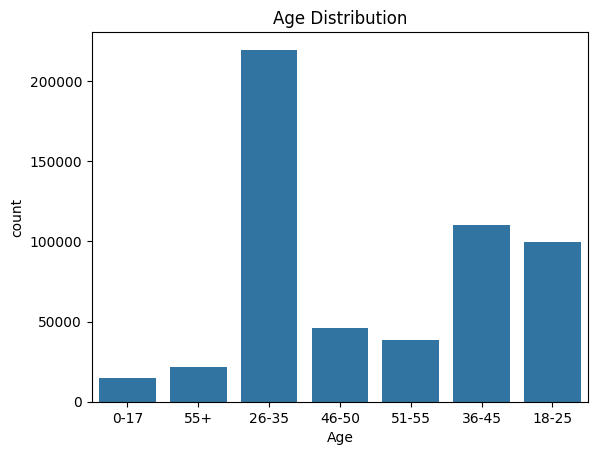

In [176]:
sns.countplot(x=df['Age'])
plt.title('Age Distribution')

* Most of the customers are in the age range 26 - 35 followed by 36 - 45 and 18 - 25.

* This also implies that Walmart has customers of almost all age groups.

Text(0.5, 1.0, 'Occupation Distribution')

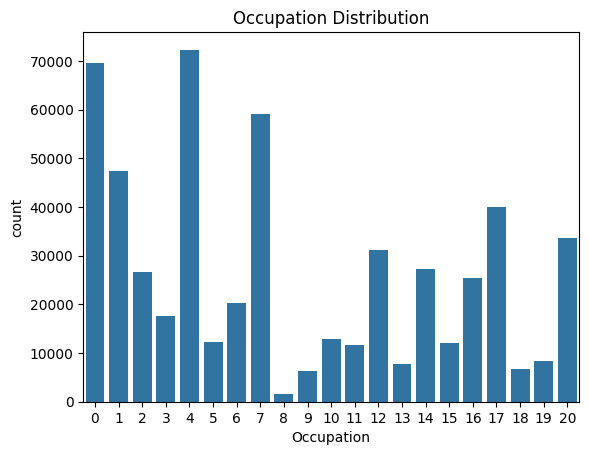

In [177]:
sns.countplot(x=df['Occupation'])
plt.title('Occupation Distribution')

* The above graph specifies that Walmart attracts customers from wide range of occupation category.

* As per Black Friday Sale most of the customers are of category 4.

Text(0.5, 1.0, 'Purchase Distribution by City Category')

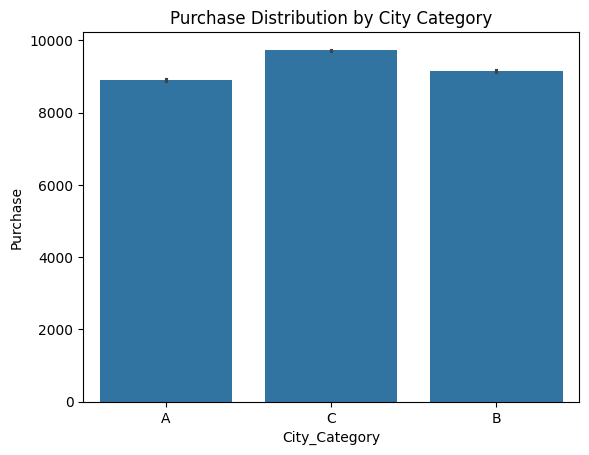

In [178]:
sns.barplot(x=df['City_Category'],y=df['Purchase'])
plt.title('Purchase Distribution by City Category')

Text(0.5, 1.0, 'Stay in Current City Years Distribution')

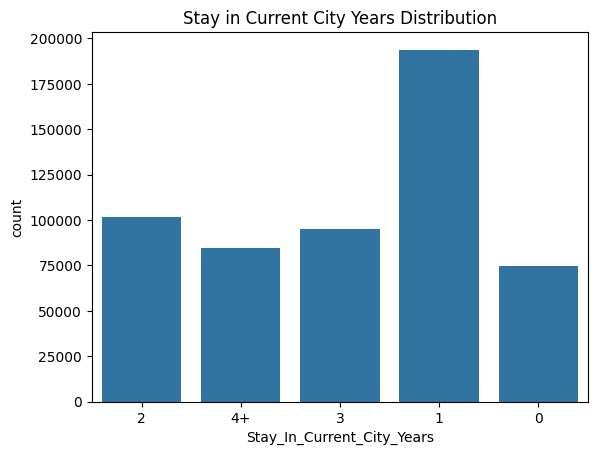

In [179]:
sns.countplot(x=df['Stay_In_Current_City_Years'])
plt.title('Stay in Current City Years Distribution')

* Most of the customers are new to the area where they are staying for 1 year, hence Walmart attracts the new customers more.

Text(0.5, 1.0, 'Top 10 Product Categories')

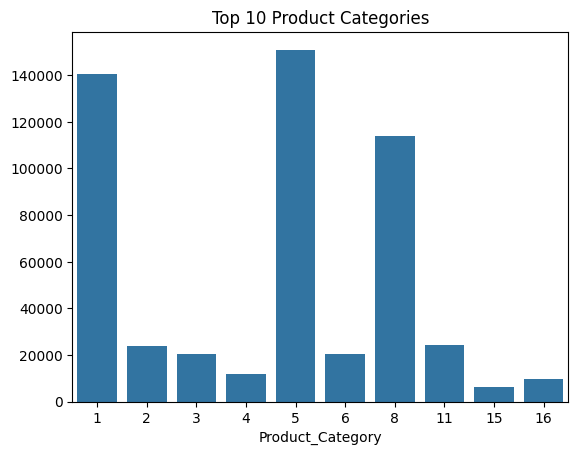

In [180]:
top_cat=df['Product_Category'].value_counts().head(10)
sns.barplot(x=top_cat.index,y=top_cat.values)
plt.title('Top 10 Product Categories')

* Product Categories 5 , 1 and 8 had a very high sale and demand in the Black friday sale whereas the remaing categories were sold comparitively very less.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'P00265242'),
  Text(1, 0, 'P00025442'),
  Text(2, 0, 'P00110742'),
  Text(3, 0, 'P00112142'),
  Text(4, 0, 'P00057642'),
  Text(5, 0, 'P00184942'),
  Text(6, 0, 'P00046742'),
  Text(7, 0, 'P00058042'),
  Text(8, 0, 'P00059442'),
  Text(9, 0, 'P00145042')])

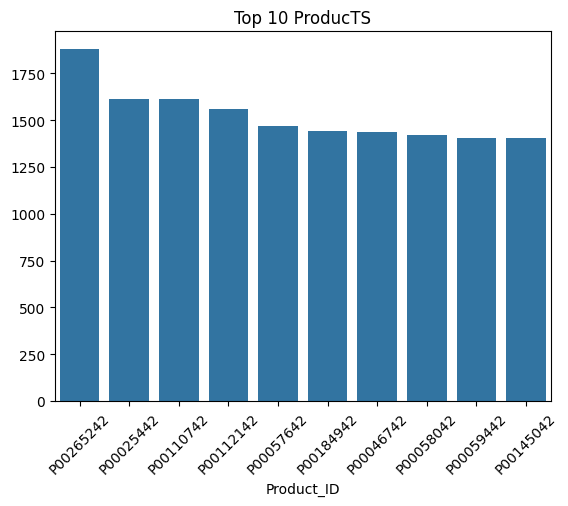

In [181]:
top_product=df['Product_ID'].value_counts().head(10)
sns.barplot(x=top_product.index,y=top_product.values)
plt.title('Top 10 ProducTS')
plt.xticks(rotation=45)

* All the Top 10 products got sold almost equally with a very less difference.

* However Product P00265242 is the most sold product.

Text(0.5, 1.0, 'Purchase Distribution')

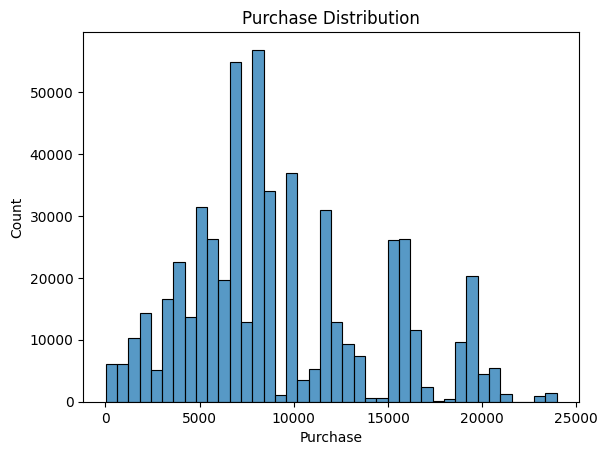

In [182]:
sns.histplot(df['Purchase'],bins=40)
plt.title('Purchase Distribution')

<Figure size 1000x600 with 0 Axes>

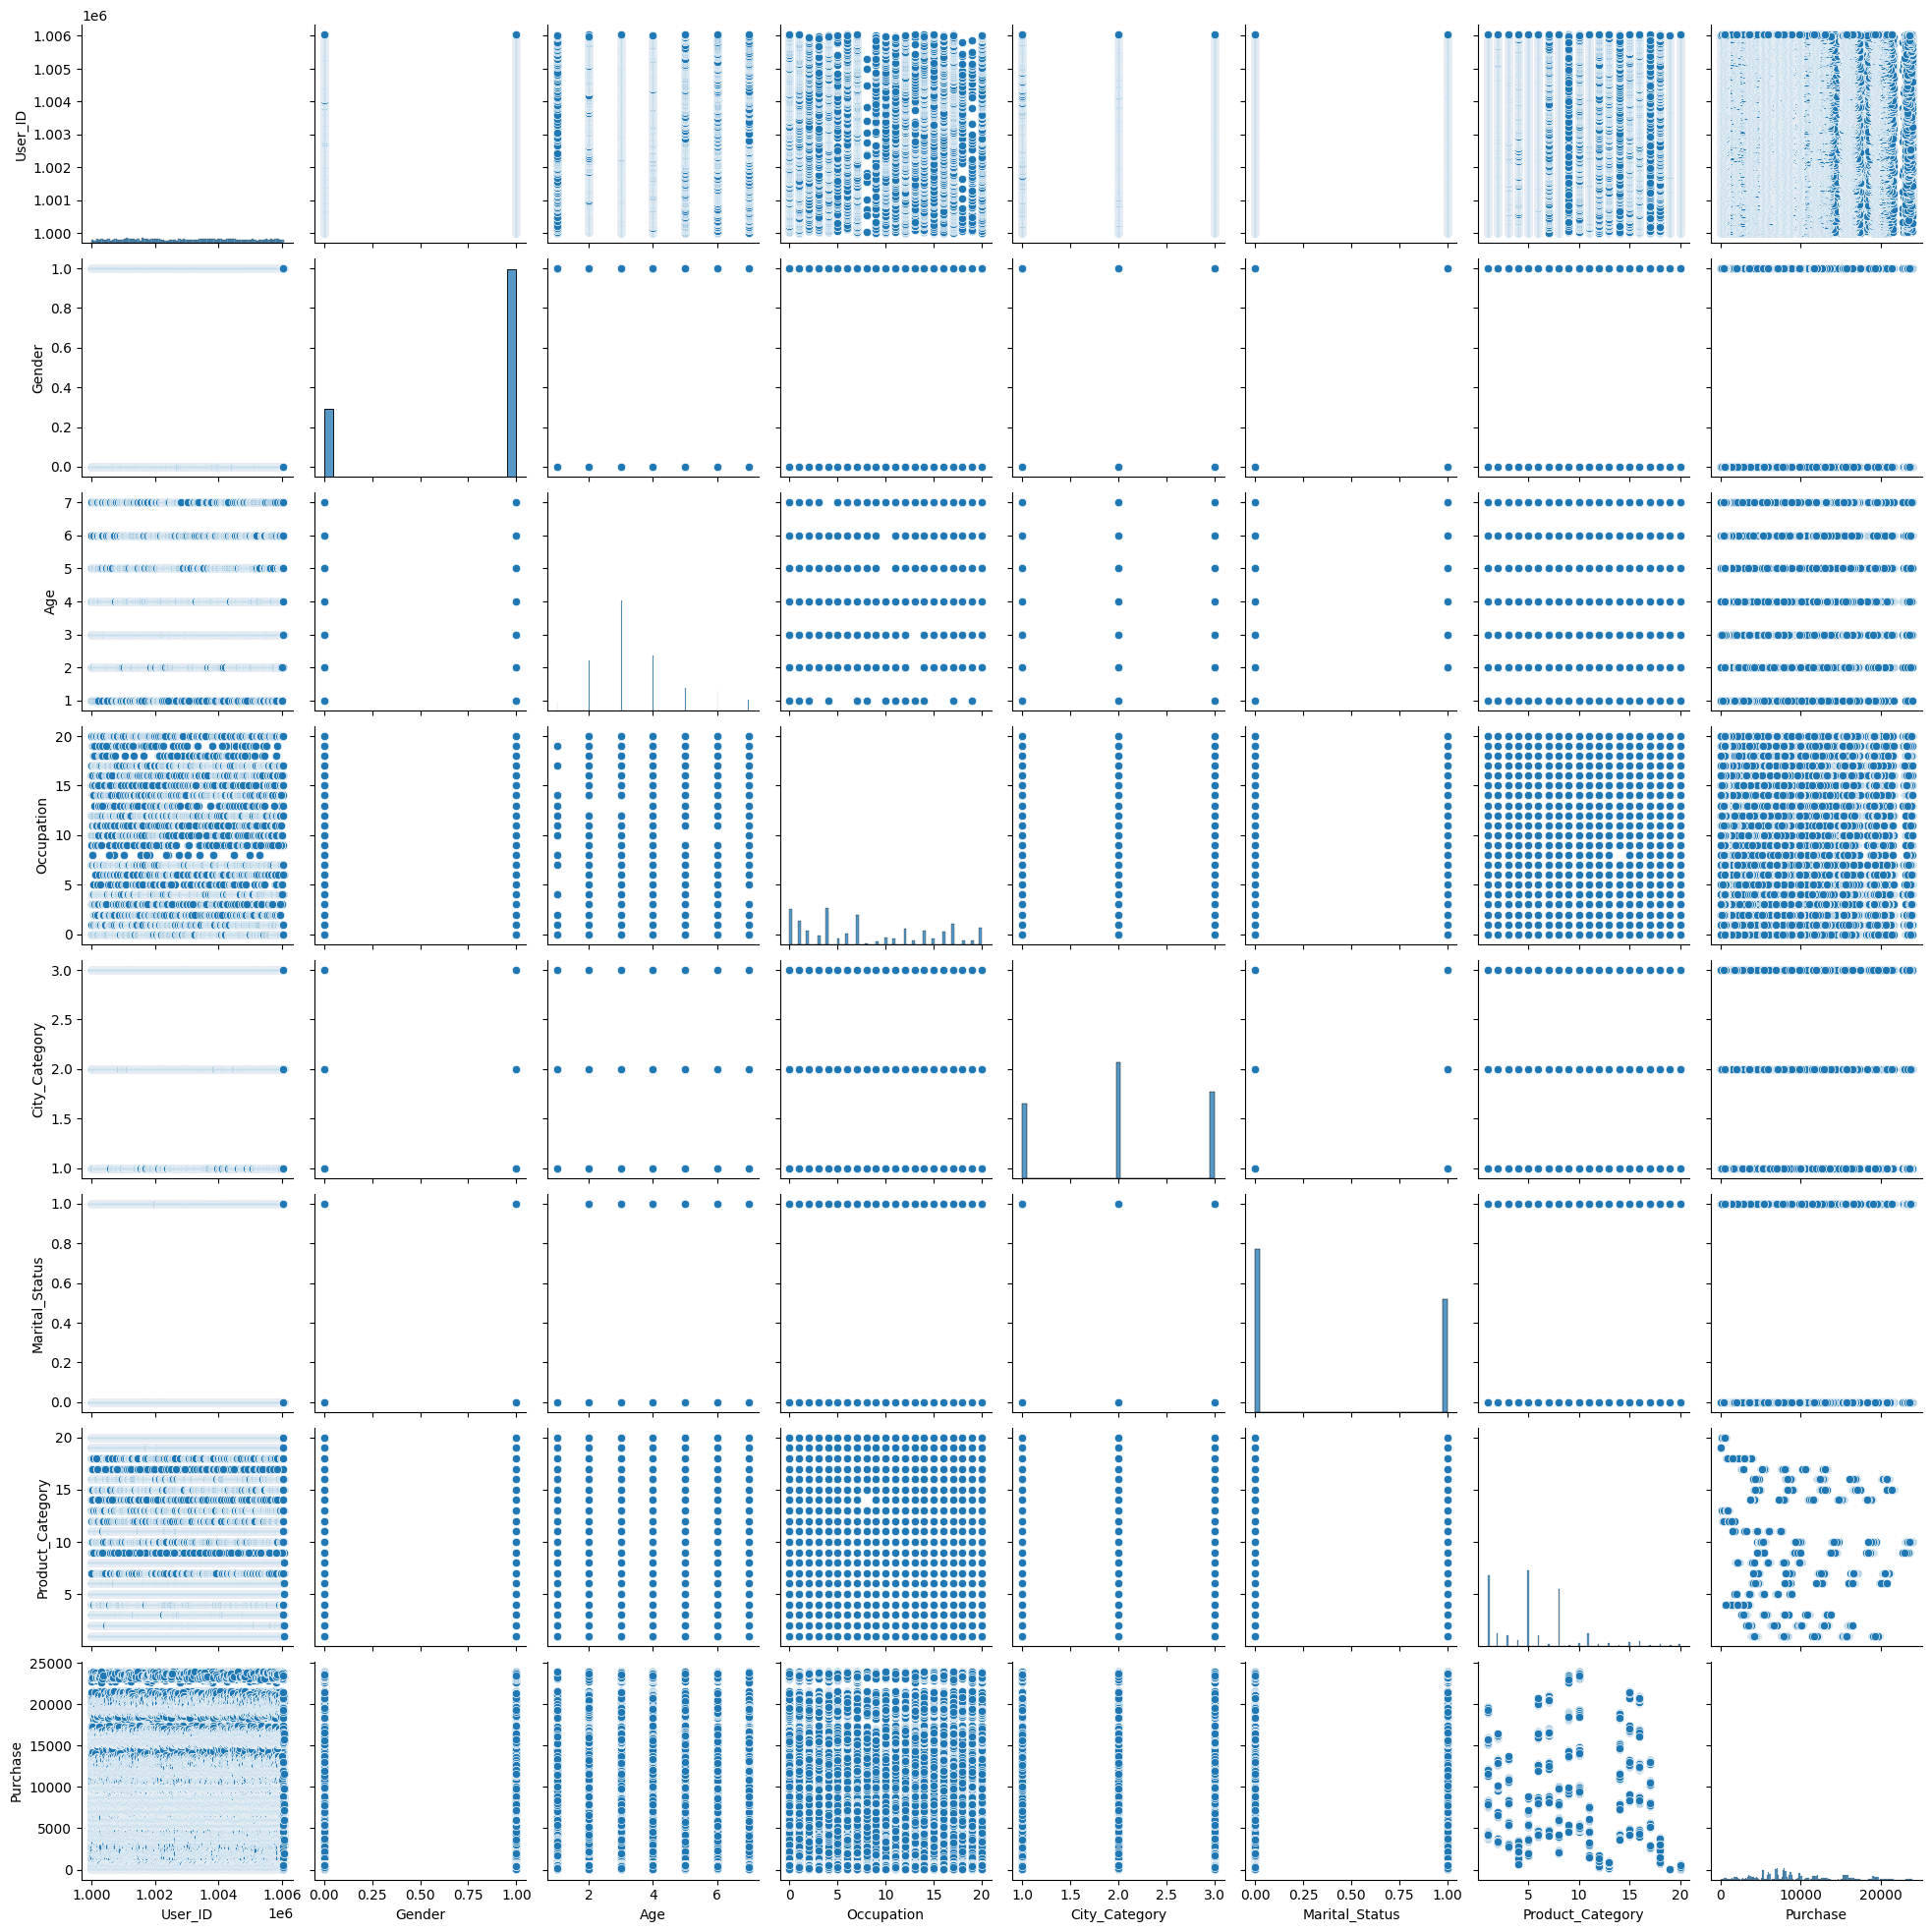

In [183]:
plt.figure(figsize=(10,6))
sns.pairplot(df_copy)
plt.show()

GENDER vs PURCHASE

Text(0.5, 1.0, 'Purchase Distribution by Gender')

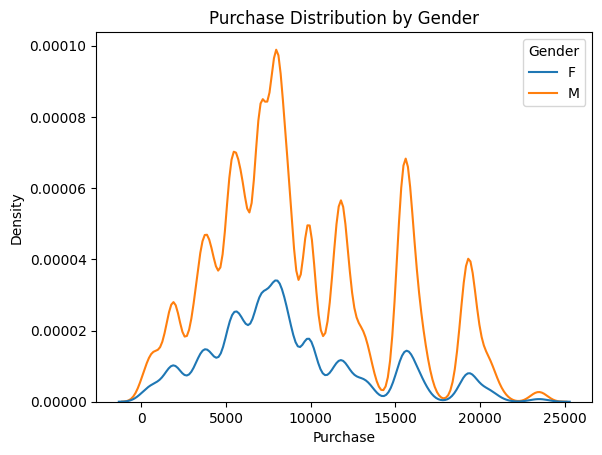

In [184]:
sns.kdeplot(x='Purchase',hue='Gender',data=df)
plt.title('Purchase Distribution by Gender')

In [185]:
gender_data=df.groupby('Gender')['Purchase'].agg(['sum','count']).reset_index()
gender_data['Amount_per_purchase']=round(gender_data['sum']/gender_data['count'],2)
gender_data

,Gender,sum,count,Amount_per_purchase
0,F,1186232642,135809,8734.57
1,M,3909580100,414259,9437.53


In [186]:
df_male=df.loc[df['Gender']=='M','Purchase']
df_female=df.loc[df['Gender']=='F','Purchase']

Sample size =300

In [187]:
sample_size = 300

male_mean = []
female_mean = []

for i in range(5000):
  male_sample = np.random.choice(df_male , sample_size)
  female_sample = np.random.choice(df_female , sample_size)

  m_mean = np.mean(male_sample)
  f_mean = np.mean(female_sample)

  male_mean.append(m_mean)
  female_mean.append(f_mean)

df_90_300 = pd.DataFrame({"male_mean" : male_mean , "female_mean" : female_mean})
df_90_300.head()


,male_mean,female_mean
0,9743.783333,8543.256667
1,9284.596667,8938.640000
2,9625.423333,8896.086667
3,9700.263333,8898.543333
4,9375.743333,8715.063333


/tmp/ipython-input-188-186788095.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_90_300['male_mean'],label='male',shade=True)
/tmp/ipython-input-188-186788095.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_90_300['female_mean'],label='female',shade=True)


Text(0.5, 1.0, 'CLT curve for sample size =300')

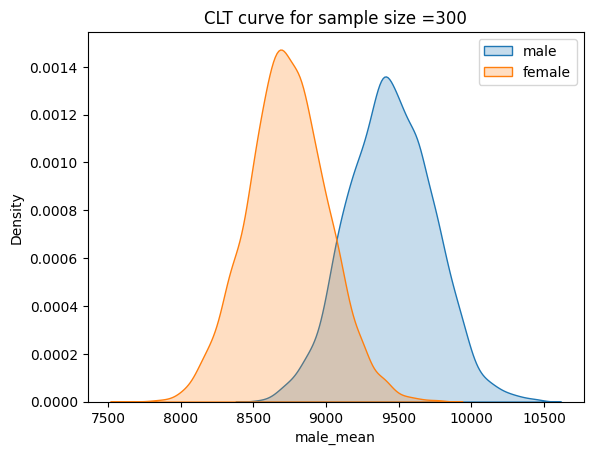

In [188]:
sns.kdeplot(df_90_300['male_mean'],label='male',shade=True)
sns.kdeplot(df_90_300['female_mean'],label='female',shade=True)
plt.legend()
plt.title('CLT curve for sample size =300')

Confidence Interval for 90%

In [189]:
percent = 90
left_interval = (100 - percent)/2
right_interval = (100 + percent)/2

interval_male = np.percentile(male_mean , [left_interval,right_interval]).round(0)
interval_female = np.percentile(female_mean , [left_interval,right_interval]).round(0)

print(f"90% Confidence Interval for  Male with Sample Size 300 is [{interval_male[0]} - {interval_male[1]}]")
print(f"Range = {interval_male[1] - interval_male[0]}")
print()
print(f"90% Confidence Interval for  Female with Sample Size 300 is [{interval_female[0]} - {interval_female[1]}]")
print(f"Range = {interval_female[1] - interval_female[0]}")


90% Confidence Interval for  Male with Sample Size 300 is [8978.0 - 9917.0]
Range = 939.0

90% Confidence Interval for  Female with Sample Size 300 is [8278.0 - 9188.0]
Range = 910.0


Confidence Interval for 95%

In [190]:
percent = 95
left_interval = (100 - percent)/2
right_interval = (100 + percent)/2

interval_male = np.percentile(male_mean , [left_interval,right_interval]).round(0)
interval_female = np.percentile(female_mean , [left_interval,right_interval]).round(0)

print(f"95% Confidence Interval for  Male with Sample Size 300 is [{interval_male[0]} - {interval_male[1]}]")
print(f"Range = {interval_male[1] - interval_male[0]}")
print()
print(f"95% Confidence Interval for  Female with Sample Size 300 is [{interval_female[0]} - {interval_female[1]}]")
print(f"Range = {interval_female[1] - interval_female[0]}")


95% Confidence Interval for  Male with Sample Size 300 is [8876.0 - 10002.0]
Range = 1126.0

95% Confidence Interval for  Female with Sample Size 300 is [8187.0 - 9275.0]
Range = 1088.0


Confidence Interval for 99%

In [191]:
percent = 99
left_interval = (100 - percent)/2
right_interval = (100 + percent)/2

interval_male = np.percentile(male_mean , [left_interval,right_interval]).round(0)
interval_female = np.percentile(female_mean , [left_interval,right_interval]).round(0)

print(f"99% Confidence Interval for  Male with Sample Size 300 is [{interval_male[0]} - {interval_male[1]}]")
print(f"Range = {interval_male[1] - interval_male[0]}")
print()
print(f"99% Confidence Interval for  Female with Sample Size 300 is [{interval_female[0]} - {interval_female[1]}]")
print(f"Range = {interval_female[1] - interval_female[0]}")


99% Confidence Interval for  Male with Sample Size 300 is [8720.0 - 10247.0]
Range = 1527.0

99% Confidence Interval for  Female with Sample Size 300 is [8047.0 - 9474.0]
Range = 1427.0


Sample Size=3000

In [192]:
sample_size = 3000

male_mean = []
female_mean = []

for i in range(5000):
  male_sample = np.random.choice(df_male , sample_size)
  female_sample = np.random.choice(df_female , sample_size)

  m_mean = np.mean(male_sample)
  f_mean = np.mean(female_sample)

  male_mean.append(m_mean)
  female_mean.append(f_mean)

df_90_3000 = pd.DataFrame({"male_mean" : male_mean , "female_mean" : female_mean})
df_90_3000.head()


,male_mean,female_mean
0,9405.546000,8847.143667
1,9301.745000,8679.358667
2,9658.693000,8621.795333
3,9496.670667,8729.797000
4,9673.284333,8886.175333


/tmp/ipython-input-193-3857702493.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_90_3000['male_mean'],label='male',shade=True)
/tmp/ipython-input-193-3857702493.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_90_3000['female_mean'],label='female',shade=True)


Text(0.5, 1.0, 'CLT curve for sample size =3000')

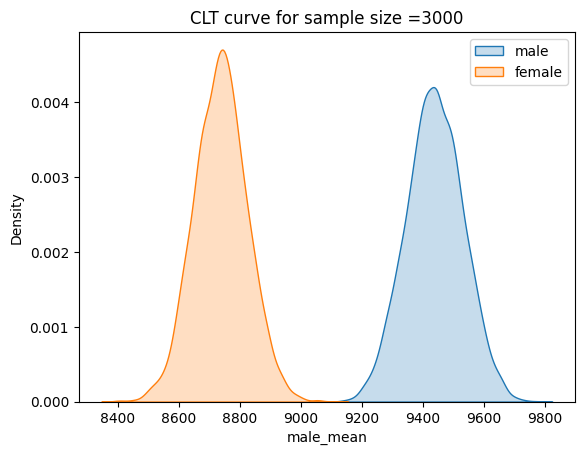

In [193]:
sns.kdeplot(df_90_3000['male_mean'],label='male',shade=True)
sns.kdeplot(df_90_3000['female_mean'],label='female',shade=True)
plt.legend()
plt.title('CLT curve for sample size =3000')

Confidence interval for 90%

In [194]:
percent = 90
left_interval = (100 - percent)/2
right_interval = (100 + percent)/2

interval_male = np.percentile(male_mean , [left_interval,right_interval]).round(0)
interval_female = np.percentile(female_mean , [left_interval,right_interval]).round(0)

print(f"90% Confidence Interval for  Male with Sample Size 3000 is [{interval_male[0]} - {interval_male[1]}]")
print(f"Range = {interval_male[1] - interval_male[0]}")
print()
print(f"90% Confidence Interval for  Female with Sample Size 3000 is [{interval_female[0]} - {interval_female[1]}]")
print(f"Range = {interval_female[1] - interval_female[0]}")


90% Confidence Interval for  Male with Sample Size 3000 is [9282.0 - 9591.0]
Range = 309.0

90% Confidence Interval for  Female with Sample Size 3000 is [8596.0 - 8881.0]
Range = 285.0


Confidence Interval for 95%

In [195]:
percent = 95
left_interval = (100 - percent)/2
right_interval = (100 + percent)/2

interval_male = np.percentile(male_mean , [left_interval,right_interval]).round(0)
interval_female = np.percentile(female_mean , [left_interval,right_interval]).round(0)

print(f"95% Confidence Interval for  Male with Sample Size 3000 is [{interval_male[0]} - {interval_male[1]}]")
print(f"Range = {interval_male[1] - interval_male[0]}")
print()
print(f"95% Confidence Interval for  Female with Sample Size 3000 is [{interval_female[0]} - {interval_female[1]}]")
print(f"Range = {interval_female[1] - interval_female[0]}")


95% Confidence Interval for  Male with Sample Size 3000 is [9257.0 - 9620.0]
Range = 363.0

95% Confidence Interval for  Female with Sample Size 3000 is [8568.0 - 8908.0]
Range = 340.0


Confidence Interval for 99%

In [196]:
percent = 99
left_interval = (100 - percent)/2
right_interval = (100 + percent)/2

interval_male = np.percentile(male_mean , [left_interval,right_interval]).round(0)
interval_female = np.percentile(female_mean , [left_interval,right_interval]).round(0)

print(f"99% Confidence Interval for  Male with Sample Size 3000 is [{interval_male[0]} - {interval_male[1]}]")
print(f"Range = {interval_male[1] - interval_male[0]}")
print()
print(f"99% Confidence Interval for  Female with Sample Size 3000 is [{interval_female[0]} - {interval_female[1]}]")
print(f"Range = {interval_female[1] - interval_female[0]}")


99% Confidence Interval for  Male with Sample Size 3000 is [9207.0 - 9663.0]
Range = 456.0

99% Confidence Interval for  Female with Sample Size 3000 is [8508.0 - 8963.0]
Range = 455.0


Sample Size=30000

In [197]:
sample_size = 30000

male_mean = []
female_mean = []

for i in range(5000):
  male_sample = np.random.choice(df_male , sample_size)
  female_sample = np.random.choice(df_female , sample_size)

  m_mean = np.mean(male_sample)
  f_mean = np.mean(female_sample)

  male_mean.append(m_mean)
  female_mean.append(f_mean)

df_90_30000 = pd.DataFrame({"male_mean" : male_mean , "female_mean" : female_mean})
df_90_30000.head()


,male_mean,female_mean
0,9386.235533,8732.003267
1,9418.266467,8725.156700
2,9465.065100,8719.823900
3,9474.188667,8729.580467
4,9402.834533,8716.362467


/tmp/ipython-input-198-3255156416.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_90_30000['male_mean'],label='male',shade=True)
/tmp/ipython-input-198-3255156416.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_90_30000['female_mean'],label='female',shade=True)


Text(0.5, 1.0, 'CLT curve for sample size =30000')

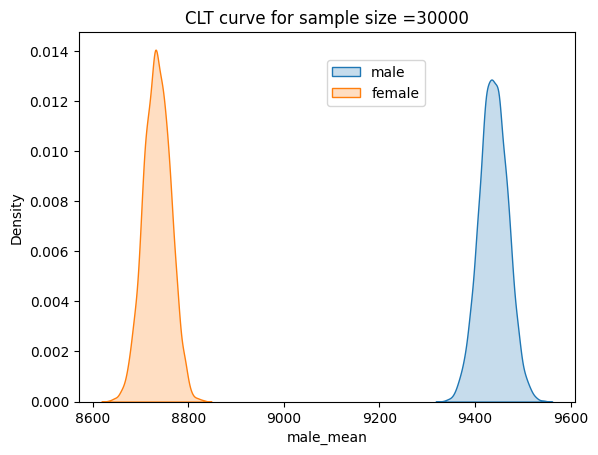

In [198]:
sns.kdeplot(df_90_30000['male_mean'],label='male',shade=True)
sns.kdeplot(df_90_30000['female_mean'],label='female',shade=True)
plt.legend(loc=(0.5,0.8))
plt.title('CLT curve for sample size =30000')

Confidence Interval for 90%

In [199]:
percent = 90
left_interval = (100 - percent)/2
right_interval = (100 + percent)/2

interval_male = np.percentile(male_mean , [left_interval,right_interval]).round(0)
interval_female = np.percentile(female_mean , [left_interval,right_interval]).round(0)

print(f"90% Confidence Interval for  Male with Sample Size 30000 is [{interval_male[0]} - {interval_male[1]}]")
print(f"Range = {interval_male[1] - interval_male[0]}")
print()
print(f"90% Confidence Interval for  Female with Sample Size 30000 is [{interval_female[0]} - {interval_female[1]}]")
print(f"Range = {interval_female[1] - interval_female[0]}")


90% Confidence Interval for  Male with Sample Size 30000 is [9389.0 - 9487.0]
Range = 98.0

90% Confidence Interval for  Female with Sample Size 30000 is [8688.0 - 8779.0]
Range = 91.0


Confidence Interval for 95%

In [200]:
percent = 95
left_interval = (100 - percent)/2
right_interval = (100 + percent)/2

interval_male = np.percentile(male_mean , [left_interval,right_interval]).round(0)
interval_female = np.percentile(female_mean , [left_interval,right_interval]).round(0)

print(f"95% Confidence Interval for  Male with Sample Size 30000 is [{interval_male[0]} - {interval_male[1]}]")
print(f"Range = {interval_male[1] - interval_male[0]}")
print()
print(f"95% Confidence Interval for  Female with Sample Size 30000 is [{interval_female[0]} - {interval_female[1]}]")
print(f"Range = {interval_female[1] - interval_female[0]}")


95% Confidence Interval for  Male with Sample Size 30000 is [9379.0 - 9496.0]
Range = 117.0

95% Confidence Interval for  Female with Sample Size 30000 is [8679.0 - 8789.0]
Range = 110.0


Confidence Interval for 99%

In [201]:
percent = 99
left_interval = (100 - percent)/2
right_interval = (100 + percent)/2

interval_male = np.percentile(male_mean , [left_interval,right_interval]).round(0)
interval_female = np.percentile(female_mean , [left_interval,right_interval]).round(0)

print(f"99% Confidence Interval for  Male with Sample Size 30000 is [{interval_male[0]} - {interval_male[1]}]")
print(f"Range = {interval_male[1] - interval_male[0]}")
print()
print(f"99% Confidence Interval for  Female with Sample Size 30000 is [{interval_female[0]} - {interval_female[1]}]")
print(f"Range = {interval_female[1] - interval_female[0]}")


99% Confidence Interval for  Male with Sample Size 30000 is [9362.0 - 9515.0]
Range = 153.0

99% Confidence Interval for  Female with Sample Size 30000 is [8662.0 - 8803.0]
Range = 141.0


* As the size of the sample increases the confidence interval is becoming more clear and accurate. Hence, more the sample size more precise is the data.

* From the above graphs its clear that as the sample size increases the CLT curves are not overlapping there by indicating a huge difference in the spending of amount by Male and Female.

* It is very clear that Male spent more money in comparison with Female in the Black Friday Sale.

MARITAL STATUS vs PURCHASE

Text(0.5, 1.0, 'Purchase Distribution by Marital Status')

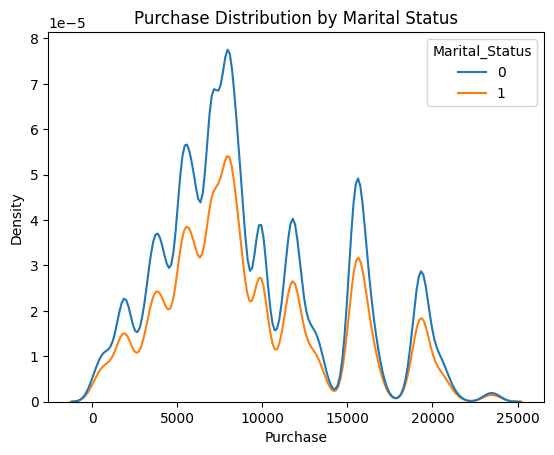

In [202]:
sns.kdeplot(x='Purchase',hue='Marital_Status',data=df)
plt.title('Purchase Distribution by Marital Status')

In [203]:
marital_data=df.groupby('Marital_Status')['Purchase'].agg(['sum','count']).reset_index()
marital_data['Amount_per_purchase']=round(marital_data['sum']/marital_data['count'],2)
marital_data

,Marital_Status,sum,count,Amount_per_purchase
0,0,3008927447,324731,9265.91
1,1,2086885295,225337,9261.17


In [204]:
dt_married=df.loc[df['Marital_Status']==1,'Purchase']
dt_unmarried=df.loc[df['Marital_Status']==0,'Purchase']

Sample size =300

In [205]:
sample_size = 300

married_mean = []
unmarried_mean = []

for i in range(5000):
  married_sample = np.random.choice(dt_married , sample_size)
  unmarried_sample = np.random.choice(dt_unmarried , sample_size)

  married_sample_mean = np.mean(married_sample)
  unmarried_sample_mean = np.mean(unmarried_sample)

  married_mean.append(married_sample_mean)
  unmarried_mean.append(unmarried_sample_mean)

df_300 = pd.DataFrame({"Married_mean" : married_mean , "Unmarried_mean" : unmarried_mean})
df_300.head()


,Married_mean,Unmarried_mean
0,9287.656667,8932.436667
1,9124.300000,9368.606667
2,8397.113333,9686.663333
3,8920.783333,9311.266667
4,9494.513333,9062.093333


/tmp/ipython-input-206-3554053212.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_300['Married_mean'],label='Married',shade=True)
/tmp/ipython-input-206-3554053212.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_300['Unmarried_mean'],label='Unmarried',shade=True)


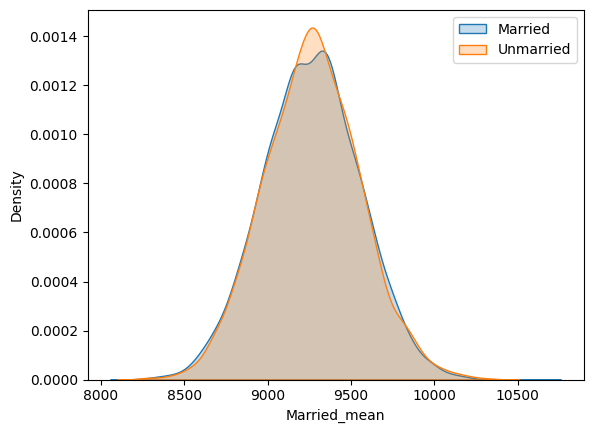

In [206]:
sns.kdeplot(df_300['Married_mean'],label='Married',shade=True)
sns.kdeplot(df_300['Unmarried_mean'],label='Unmarried',shade=True)
plt.legend()

Confidence Interval for 90%

In [207]:
percent  = 90
left_interval = (100 - percent)/2
right_interval = (100 + percent)/2

interval_married = np.percentile(married_mean , [left_interval , right_interval]).round(0)
interval_unmarried = np.percentile(unmarried_mean , [left_interval , right_interval]).round(0)

print(f"90% Confidence Interval for  Married people with Sample Size 300 is [{interval_married[0]} - {interval_married[1]}]")
print(f"Range = {interval_married[1] - interval_married[0]}")
print()
print(f"90% Confidence Interval for Unmarried people with Sample Size 300 is [{interval_unmarried[0]} - {interval_unmarried[1]}]")
print(f"Range = {interval_unmarried[1] - interval_unmarried[0]}")


90% Confidence Interval for  Married people with Sample Size 300 is [8780.0 - 9742.0]
Range = 962.0

90% Confidence Interval for Unmarried people with Sample Size 300 is [8798.0 - 9748.0]
Range = 950.0


Confidence Interval for 95%

In [208]:
percent  = 95
left_interval = (100 - percent)/2
right_interval = (100 + percent)/2

interval_married = np.percentile(married_mean , [left_interval , right_interval]).round(0)
interval_unmarried = np.percentile(unmarried_mean , [left_interval , right_interval]).round(0)

print(f"95% Confidence Interval for  Married people with Sample Size 300 is [{interval_married[0]} - {interval_married[1]}]")
print(f"Range = {interval_married[1] - interval_married[0]}")
print()
print(f"95% Confidence Interval for Unmarried people with Sample Size 300 is [{interval_unmarried[0]} - {interval_unmarried[1]}]")
print(f"Range = {interval_unmarried[1] - interval_unmarried[0]}")


95% Confidence Interval for  Married people with Sample Size 300 is [8690.0 - 9836.0]
Range = 1146.0

95% Confidence Interval for Unmarried people with Sample Size 300 is [8707.0 - 9849.0]
Range = 1142.0


Confidence Interval for 99%

In [209]:
percent  = 99
left_interval = (100 - percent)/2
right_interval = (100 + percent)/2

interval_married = np.percentile(married_mean , [left_interval , right_interval]).round(0)
interval_unmarried = np.percentile(unmarried_mean , [left_interval , right_interval]).round(0)

print(f"99% Confidence Interval for  Married people with Sample Size 300 is [{interval_married[0]} - {interval_married[1]}]")
print(f"Range = {interval_married[1] - interval_married[0]}")
print()
print(f"99% Confidence Interval for Unmarried people with Sample Size 300 is [{interval_unmarried[0]} - {interval_unmarried[1]}]")
print(f"Range = {interval_unmarried[1] - interval_unmarried[0]}")


99% Confidence Interval for  Married people with Sample Size 300 is [8533.0 - 10000.0]
Range = 1467.0

99% Confidence Interval for Unmarried people with Sample Size 300 is [8532.0 - 10049.0]
Range = 1517.0


Sample size=3000

In [210]:
sample_size = 3000

married_mean = []
unmarried_mean = []

for i in range(5000):
  married_sample = np.random.choice(dt_married , sample_size)
  unmarried_sample = np.random.choice(dt_unmarried , sample_size)

  married_sample_mean = np.mean(married_sample)
  unmarried_sample_mean = np.mean(unmarried_sample)

  married_mean.append(married_sample_mean)
  unmarried_mean.append(unmarried_sample_mean)

df_3000 = pd.DataFrame({"Married_mean" : married_mean , "Unmarried_mean" : unmarried_mean})
df_3000.head()


,Married_mean,Unmarried_mean
0,9327.596667,9295.764000
1,9376.660667,9040.281667
2,9234.496000,9361.376667
3,9265.723333,9397.671000
4,9318.164000,9229.084333


/tmp/ipython-input-211-575681584.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_3000['Married_mean'],label='Married',shade=True)
/tmp/ipython-input-211-575681584.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_3000['Unmarried_mean'],label='Unmarried',shade=True)


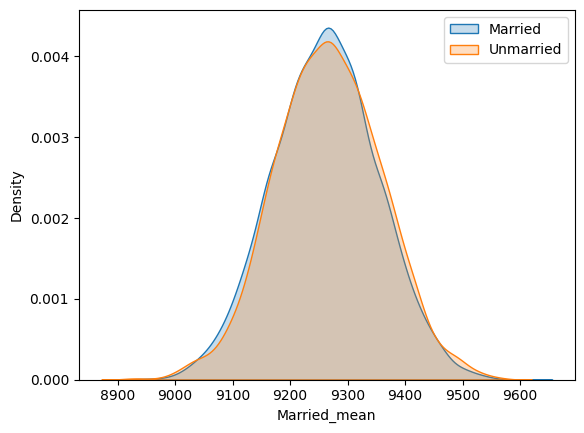

In [211]:
sns.kdeplot(df_3000['Married_mean'],label='Married',shade=True)
sns.kdeplot(df_3000['Unmarried_mean'],label='Unmarried',shade=True)
plt.legend()

Confidence Interval for 90%

In [212]:
percent  = 90
left_interval = (100 - percent)/2
right_interval = (100 + percent)/2

interval_married = np.percentile(married_mean , [left_interval , right_interval]).round(0)
interval_unmarried = np.percentile(unmarried_mean , [left_interval , right_interval]).round(0)

print(f"90% Confidence Interval for  Married people with Sample Size 3000 is [{interval_married[0]} - {interval_married[1]}]")
print(f"Range = {interval_married[1] - interval_married[0]}")
print()
print(f"90% Confidence Interval for Unmarried people with Sample Size 3000 is [{interval_unmarried[0]} - {interval_unmarried[1]}]")
print(f"Range = {interval_unmarried[1] - interval_unmarried[0]}")


90% Confidence Interval for  Married people with Sample Size 3000 is [9111.0 - 9411.0]
Range = 300.0

90% Confidence Interval for Unmarried people with Sample Size 3000 is [9119.0 - 9418.0]
Range = 299.0


Confidence Interval for 95%

In [213]:
percent  = 95
left_interval = (100 - percent)/2
right_interval = (100 + percent)/2

interval_married = np.percentile(married_mean , [left_interval , right_interval]).round(0)
interval_unmarried = np.percentile(unmarried_mean , [left_interval , right_interval]).round(0)

print(f"95% Confidence Interval for  Married people with Sample Size 3000 is [{interval_married[0]} - {interval_married[1]}]")
print(f"Range = {interval_married[1] - interval_married[0]}")
print()
print(f"95% Confidence Interval for Unmarried people with Sample Size 3000 is [{interval_unmarried[0]} - {interval_unmarried[1]}]")
print(f"Range = {interval_unmarried[1] - interval_unmarried[0]}")


95% Confidence Interval for  Married people with Sample Size 3000 is [9082.0 - 9439.0]
Range = 357.0

95% Confidence Interval for Unmarried people with Sample Size 3000 is [9087.0 - 9448.0]
Range = 361.0


Confidence Interval for 99%

In [214]:
percent  = 99
left_interval = (100 - percent)/2
right_interval = (100 + percent)/2

interval_married = np.percentile(married_mean , [left_interval , right_interval]).round(0)
interval_unmarried = np.percentile(unmarried_mean , [left_interval , right_interval]).round(0)

print(f"99% Confidence Interval for  Married people with Sample Size 3000 is [{interval_married[0]} - {interval_married[1]}]")
print(f"Range = {interval_married[1] - interval_married[0]}")
print()
print(f"99% Confidence Interval for Unmarried people with Sample Size 3000 is [{interval_unmarried[0]} - {interval_unmarried[1]}]")
print(f"Range = {interval_unmarried[1] - interval_unmarried[0]}")


99% Confidence Interval for  Married people with Sample Size 3000 is [9033.0 - 9494.0]
Range = 461.0

99% Confidence Interval for Unmarried people with Sample Size 3000 is [9023.0 - 9502.0]
Range = 479.0


Sample size=30000

In [215]:
sample_size = 30000

married_mean = []
unmarried_mean = []

for i in range(5000):
  married_sample = np.random.choice(dt_married , sample_size)
  unmarried_sample = np.random.choice(dt_unmarried , sample_size)

  married_sample_mean = np.mean(married_sample)
  unmarried_sample_mean = np.mean(unmarried_sample)

  married_mean.append(married_sample_mean)
  unmarried_mean.append(unmarried_sample_mean)

df_30000 = pd.DataFrame({"Married_mean" : married_mean , "Unmarried_mean" : unmarried_mean})
df_30000.head()

,Married_mean,Unmarried_mean
0,9256.130800,9331.460267
1,9235.209667,9238.991267
2,9229.229267,9249.578100
3,9264.584367,9228.243300
4,9274.755233,9238.005333


/tmp/ipython-input-216-3251723272.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_30000['Married_mean'],label='Married',shade=True)
/tmp/ipython-input-216-3251723272.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_30000['Unmarried_mean'],label='Unmarried',shade=True)


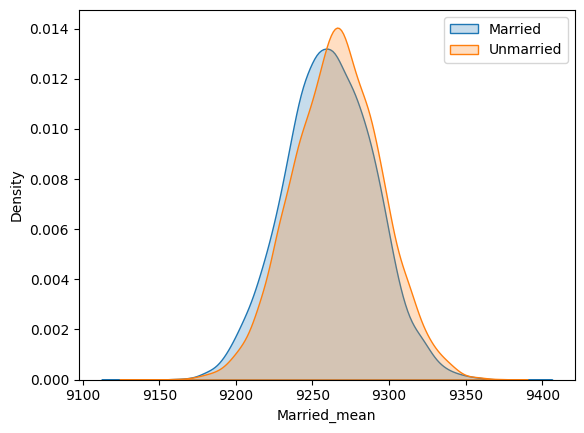

In [216]:
sns.kdeplot(df_30000['Married_mean'],label='Married',shade=True)
sns.kdeplot(df_30000['Unmarried_mean'],label='Unmarried',shade=True)
plt.legend()

Confidence Interval for 90%

In [217]:
percent  = 90
left_interval = (100 - percent)/2
right_interval = (100 + percent)/2

interval_married = np.percentile(married_mean , [left_interval , right_interval]).round(0)
interval_unmarried = np.percentile(unmarried_mean , [left_interval , right_interval]).round(0)

print(f"90% Confidence Interval for  Married people with Sample Size 30000 is [{interval_married[0]} - {interval_married[1]}]")
print(f"Range = {interval_married[1] - interval_married[0]}")
print()
print(f"90% Confidence Interval for Unmarried people with Sample Size 30000 is [{interval_unmarried[0]} - {interval_unmarried[1]}]")
print(f"Range = {interval_unmarried[1] - interval_unmarried[0]}")

90% Confidence Interval for  Married people with Sample Size 30000 is [9213.0 - 9308.0]
Range = 95.0

90% Confidence Interval for Unmarried people with Sample Size 30000 is [9218.0 - 9313.0]
Range = 95.0


Confidence Interval for 95%

In [218]:
percent  = 95
left_interval = (100 - percent)/2
right_interval = (100 + percent)/2

interval_married = np.percentile(married_mean , [left_interval , right_interval]).round(0)
interval_unmarried = np.percentile(unmarried_mean , [left_interval , right_interval]).round(0)

print(f"95% Confidence Interval for  Married people with Sample Size 30000 is [{interval_married[0]} - {interval_married[1]}]")
print(f"Range = {interval_married[1] - interval_married[0]}")
print()
print(f"95% Confidence Interval for Unmarried people with Sample Size 30000 is [{interval_unmarried[0]} - {interval_unmarried[1]}]")
print(f"Range = {interval_unmarried[1] - interval_unmarried[0]}")

95% Confidence Interval for  Married people with Sample Size 30000 is [9204.0 - 9319.0]
Range = 115.0

95% Confidence Interval for Unmarried people with Sample Size 30000 is [9210.0 - 9323.0]
Range = 113.0


Confidence Interval for 99%

In [219]:
percent  = 99
left_interval = (100 - percent)/2
right_interval = (100 + percent)/2

interval_married = np.percentile(married_mean , [left_interval , right_interval]).round(0)
interval_unmarried = np.percentile(unmarried_mean , [left_interval , right_interval]).round(0)

print(f"99% Confidence Interval for  Married people with Sample Size 30000 is [{interval_married[0]} - {interval_married[1]}]")
print(f"Range = {interval_married[1] - interval_married[0]}")
print()
print(f"99% Confidence Interval for Unmarried people with Sample Size 30000 is [{interval_unmarried[0]} - {interval_unmarried[1]}]")
print(f"Range = {interval_unmarried[1] - interval_unmarried[0]}")

99% Confidence Interval for  Married people with Sample Size 30000 is [9188.0 - 9336.0]
Range = 148.0

99% Confidence Interval for Unmarried people with Sample Size 30000 is [9192.0 - 9340.0]
Range = 148.0


As the size of the sample increases the confidence interval is becoming more clear and accurate. Hence, more the sample size more precise is the data.

From the above graphs its clear that as the sample size increases the CLT curves are overlapping there by indicating the amount spent by both Married and Unmarried people are almost same.

Hence both Married and Unmarried people had equal contribution in the Black Friday Sale.

AGE vs PURCHASE

Text(0.5, 1.0, 'Purchase Distribution by Age')

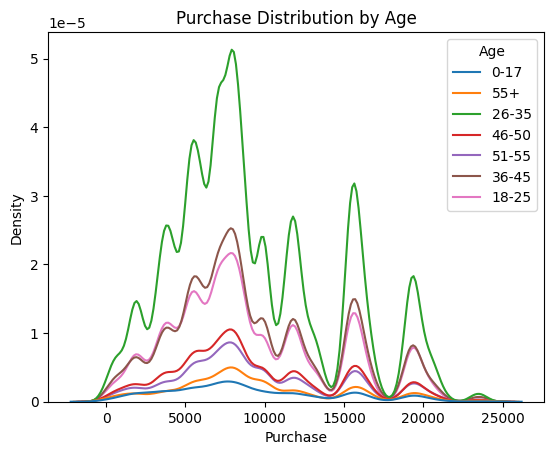

In [220]:
sns.kdeplot(x='Purchase',hue='Age',data=df)
plt.title('Purchase Distribution by Age')

In [221]:
age_data=df.groupby('Age')['Purchase'].agg(['sum','count']).reset_index()
age_data['Purchase_per_age']=round(age_data['sum']/age_data['count'],2)
age_data

,Age,sum,count,Purchase_per_age
0,0-17,134913183,15102,8933.46
1,18-25,913848675,99660,9169.66
2,26-35,2031770578,219587,9252.69
3,36-45,1026569884,110013,9331.35
4,46-50,420843403,45701,9208.63
5,51-55,367099644,38501,9534.81
6,55+,200767375,21504,9336.28


* Age group from 26 - 45 has the major contribution to the purchases made

* Still the amount per transaction is almost same for all the age groups where 0 -17 has the least purchase whereas 51 - 55 has the most purchase.

In [222]:
dt_0_17 = df.loc[df["Age"]=="0-17","Purchase"]
dt_18_25 = df.loc[df["Age"]=="18-25","Purchase"]
dt_26_35 = df.loc[df["Age"]=="26-35","Purchase"]
dt_36_45 = df.loc[df["Age"]=="36-45","Purchase"]
dt_46_50 = df.loc[df["Age"]=="46-50","Purchase"]
dt_51_55 = df.loc[df["Age"]=="51-55","Purchase"]
dt_55 = df.loc[df["Age"]=="55+","Purchase"]

Sampple size=300

In [223]:
sample_size=300

mean_0_17=[]
mean_18_25=[]
mean_26_35=[]
mean_36_45 = []
mean_46_50 = []
mean_51_55 = []
mean_55 = []

for i in range(5000):
  sample_17=np.random.choice(dt_0_17,sample_size)
  sample_25=np.random.choice(dt_18_25,sample_size)
  sample_35=np.random.choice(dt_26_35,sample_size)
  sample_45=np.random.choice(dt_36_45,sample_size)
  sample_50=np.random.choice(dt_46_50,sample_size)
  sample_55=np.random.choice(dt_51_55,sample_size)
  sample_56=np.random.choice(dt_55,sample_size)

  mean_0_17.append(np.mean(sample_17))
  mean_18_25.append(np.mean(sample_25))
  mean_26_35.append(np.mean(sample_35))
  mean_36_45.append(np.mean(sample_45))
  mean_46_50.append(np.mean(sample_50))
  mean_51_55.append(np.mean(sample_55))
  mean_55.append(np.mean(sample_56))

df_300=pd.DataFrame({"0-17": mean_0_17,"18-25" : mean_18_25 ,"26-35" : mean_26_35 ,"36-45" : mean_36_45 ,"46-50" : mean_46_50 ,"51-55" : mean_51_55 ,"55+" : mean_55 ,})
df_300.head()



,0-17,18-25,26-35,36-45,46-50,51-55,55+
0,9284.223333,9266.986667,8744.796667,9175.440000,8743.336667,9465.120000,9414.853333
1,8514.066667,9274.206667,10058.776667,10224.436667,9295.693333,9427.513333,9394.760000
2,9163.316667,9400.286667,9547.666667,9433.983333,9593.920000,9638.336667,9438.160000
3,8734.466667,9693.210000,9515.186667,9246.780000,9296.053333,9271.706667,8542.700000
4,8861.890000,8871.996667,9155.833333,9410.996667,8841.003333,9319.440000,9498.756667


/tmp/ipython-input-224-2884822152.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_300['0-17'],label='0-17',shade=True)
/tmp/ipython-input-224-2884822152.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_300['18-25'],label='18-25',shade=True)
/tmp/ipython-input-224-2884822152.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_300['26-35'],label='26-35',shade=True)
/tmp/ipython-input-224-2884822152.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_300['36-45'],label='36-45',shade=

Text(0.5, 1.0, 'CLT curve for sample size =300')

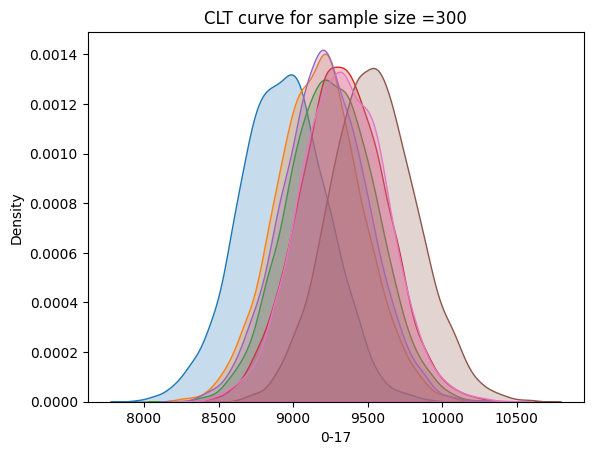

In [224]:
sns.kdeplot(df_300['0-17'],label='0-17',shade=True)
sns.kdeplot(df_300['18-25'],label='18-25',shade=True)
sns.kdeplot(df_300['26-35'],label='26-35',shade=True)
sns.kdeplot(df_300['36-45'],label='36-45',shade=True)
sns.kdeplot(df_300['46-50'],label='46-50',shade=True)
sns.kdeplot(df_300['51-55'],label='51-55',shade=True)
sns.kdeplot(df_300['55+'],label='55+',shade=True)
plt.title('CLT curve for sample size =300')

Confidence Interval for 90%

In [225]:
percent  = 90
left_interval = (100 - percent)/2
right_interval = (100 + percent)/2

interval_age_17 = np.percentile(mean_0_17 , [left_interval , right_interval]).round(0)
interval_age_25 = np.percentile(mean_18_25 , [left_interval , right_interval]).round(0)
interval_age_35 = np.percentile(mean_26_35 , [left_interval , right_interval]).round(0)
interval_age_45 = np.percentile(mean_36_45 , [left_interval , right_interval]).round(0)
interval_age_50 = np.percentile(mean_46_50 , [left_interval , right_interval]).round(0)
interval_age_55 = np.percentile(mean_51_55 , [left_interval , right_interval]).round(0)
interval_age_56 = np.percentile(mean_55 , [left_interval , right_interval]).round(0)

print(f"90% Confidence Interval for people with age 0 - 17 and Sample Size 300 is [{interval_age_17[0]} - {interval_age_17[1]}]")
print(f"Range = {interval_age_17[1] - interval_age_17[0]}")
print()
print(f"90% Confidence Interval for people with age 18 - 25 and Sample Size 300 is [{interval_age_25[0]} - {interval_age_25[1]}]")
print(f"Range = {interval_age_25[1] - interval_age_25[0]}")
print()
print(f"90% Confidence Interval for people with age 26 - 35 and Sample Size 300 is [{interval_age_35[0]} - {interval_age_35[1]}]")
print(f"Range = {interval_age_35[1] - interval_age_35[0]}")
print()
print(f"90% Confidence Interval for people with age 36 - 45 and Sample Size 300 is [{interval_age_45[0]} - {interval_age_45[1]}]")
print(f"Range = {interval_age_45[1] - interval_age_45[0]}")
print()
print(f"90% Confidence Interval for people with age 46 - 50 and Sample Size 300 is [{interval_age_50[0]} - {interval_age_50[1]}]")
print(f"Range = {interval_age_50[1] - interval_age_50[0]}")
print()
print(f"90% Confidence Interval for people with age 51 - 55 and Sample Size 300 is [{interval_age_55[0]} - {interval_age_55[1]}]")
print(f"Range = {interval_age_55[1] - interval_age_55[0]}")
print()
print(f"90% Confidence Interval for people with age 55+ and Sample Size 300 is [{interval_age_56[0]} - {interval_age_56[1]}]")
print(f"Range = {interval_age_56[1] - interval_age_56[0]}")

90% Confidence Interval for people with age 0 - 17 and Sample Size 300 is [8452.0 - 9417.0]
Range = 965.0

90% Confidence Interval for people with age 18 - 25 and Sample Size 300 is [8698.0 - 9654.0]
Range = 956.0

90% Confidence Interval for people with age 26 - 35 and Sample Size 300 is [8782.0 - 9732.0]
Range = 950.0

90% Confidence Interval for people with age 36 - 45 and Sample Size 300 is [8856.0 - 9797.0]
Range = 941.0

90% Confidence Interval for people with age 46 - 50 and Sample Size 300 is [8736.0 - 9687.0]
Range = 951.0

90% Confidence Interval for people with age 51 - 55 and Sample Size 300 is [9059.0 - 10038.0]
Range = 979.0

90% Confidence Interval for people with age 55+ and Sample Size 300 is [8866.0 - 9802.0]
Range = 936.0


Confidance interval for 95%

In [226]:
percent  = 95
left_interval = (100 - percent)/2
right_interval = (100 + percent)/2

interval_age_17 = np.percentile(mean_0_17 , [left_interval , right_interval]).round(0)
interval_age_25 = np.percentile(mean_18_25 , [left_interval , right_interval]).round(0)
interval_age_35 = np.percentile(mean_26_35 , [left_interval , right_interval]).round(0)
interval_age_45 = np.percentile(mean_36_45 , [left_interval , right_interval]).round(0)
interval_age_50 = np.percentile(mean_46_50 , [left_interval , right_interval]).round(0)
interval_age_55 = np.percentile(mean_51_55 , [left_interval , right_interval]).round(0)
interval_age_56 = np.percentile(mean_55 , [left_interval , right_interval]).round(0)

print(f"95% Confidence Interval for people with age 0 - 17 and Sample Size 300 is [{interval_age_17[0]} - {interval_age_17[1]}]")
print(f"Range = {interval_age_17[1] - interval_age_17[0]}")
print()
print(f"95% Confidence Interval for people with age 18 - 25 and Sample Size 300 is [{interval_age_25[0]} - {interval_age_25[1]}]")
print(f"Range = {interval_age_25[1] - interval_age_25[0]}")
print()
print(f"95% Confidence Interval for people with age 26 - 35 and Sample Size 300 is [{interval_age_35[0]} - {interval_age_35[1]}]")
print(f"Range = {interval_age_35[1] - interval_age_35[0]}")
print()
print(f"95% Confidence Interval for people with age 36 - 45 and Sample Size 300 is [{interval_age_45[0]} - {interval_age_45[1]}]")
print(f"Range = {interval_age_45[1] - interval_age_45[0]}")
print()
print(f"95% Confidence Interval for people with age 46 - 50 and Sample Size 300 is [{interval_age_50[0]} - {interval_age_50[1]}]")
print(f"Range = {interval_age_50[1] - interval_age_50[0]}")
print()
print(f"95% Confidence Interval for people with age 51 - 55 and Sample Size 300 is [{interval_age_55[0]} - {interval_age_55[1]}]")
print(f"Range = {interval_age_55[1] - interval_age_55[0]}")
print()
print(f"95% Confidence Interval for people with age 55+ and Sample Size 300 is [{interval_age_56[0]} - {interval_age_56[1]}]")
print(f"Range = {interval_age_56[1] - interval_age_56[0]}")

95% Confidence Interval for people with age 0 - 17 and Sample Size 300 is [8351.0 - 9500.0]
Range = 1149.0

95% Confidence Interval for people with age 18 - 25 and Sample Size 300 is [8614.0 - 9749.0]
Range = 1135.0

95% Confidence Interval for people with age 26 - 35 and Sample Size 300 is [8688.0 - 9827.0]
Range = 1139.0

95% Confidence Interval for people with age 36 - 45 and Sample Size 300 is [8764.0 - 9892.0]
Range = 1128.0

95% Confidence Interval for people with age 46 - 50 and Sample Size 300 is [8651.0 - 9786.0]
Range = 1135.0

95% Confidence Interval for people with age 51 - 55 and Sample Size 300 is [8981.0 - 10131.0]
Range = 1150.0

95% Confidence Interval for people with age 55+ and Sample Size 300 is [8770.0 - 9899.0]
Range = 1129.0


Confidence interval for 99%

In [227]:
percent  = 99
left_interval = (100 - percent)/2
right_interval = (100 + percent)/2

interval_age_17 = np.percentile(mean_0_17 , [left_interval , right_interval]).round(0)
interval_age_25 = np.percentile(mean_18_25 , [left_interval , right_interval]).round(0)
interval_age_35 = np.percentile(mean_26_35 , [left_interval , right_interval]).round(0)
interval_age_45 = np.percentile(mean_36_45 , [left_interval , right_interval]).round(0)
interval_age_50 = np.percentile(mean_46_50 , [left_interval , right_interval]).round(0)
interval_age_55 = np.percentile(mean_51_55 , [left_interval , right_interval]).round(0)
interval_age_56 = np.percentile(mean_55 , [left_interval , right_interval]).round(0)

print(f"99% Confidence Interval for people with age 0 - 17 and Sample Size 300 is [{interval_age_17[0]} - {interval_age_17[1]}]")
print(f"Range = {interval_age_17[1] - interval_age_17[0]}")
print()
print(f"99% Confidence Interval for people with age 18 - 25 and Sample Size 300 is [{interval_age_25[0]} - {interval_age_25[1]}]")
print(f"Range = {interval_age_25[1] - interval_age_25[0]}")
print()
print(f"99% Confidence Interval for people with age 26 - 35 and Sample Size 300 is [{interval_age_35[0]} - {interval_age_35[1]}]")
print(f"Range = {interval_age_35[1] - interval_age_35[0]}")
print()
print(f"99% Confidence Interval for people with age 36 - 45 and Sample Size 300 is [{interval_age_45[0]} - {interval_age_45[1]}]")
print(f"Range = {interval_age_45[1] - interval_age_45[0]}")
print()
print(f"99% Confidence Interval for people with age 46 - 50 and Sample Size 300 is [{interval_age_50[0]} - {interval_age_50[1]}]")
print(f"Range = {interval_age_50[1] - interval_age_50[0]}")
print()
print(f"99% Confidence Interval for people with age 51 - 55 and Sample Size 300 is [{interval_age_55[0]} - {interval_age_55[1]}]")
print(f"Range = {interval_age_55[1] - interval_age_55[0]}")
print()
print(f"99% Confidence Interval for people with age 55+ and Sample Size 300 is [{interval_age_56[0]} - {interval_age_56[1]}]")
print(f"Range = {interval_age_56[1] - interval_age_56[0]}")

99% Confidence Interval for people with age 0 - 17 and Sample Size 300 is [8181.0 - 9714.0]
Range = 1533.0

99% Confidence Interval for people with age 18 - 25 and Sample Size 300 is [8450.0 - 9920.0]
Range = 1470.0

99% Confidence Interval for people with age 26 - 35 and Sample Size 300 is [8526.0 - 10006.0]
Range = 1480.0

99% Confidence Interval for people with age 36 - 45 and Sample Size 300 is [8598.0 - 10099.0]
Range = 1501.0

99% Confidence Interval for people with age 46 - 50 and Sample Size 300 is [8472.0 - 9959.0]
Range = 1487.0

99% Confidence Interval for people with age 51 - 55 and Sample Size 300 is [8806.0 - 10342.0]
Range = 1536.0

99% Confidence Interval for people with age 55+ and Sample Size 300 is [8582.0 - 10112.0]
Range = 1530.0


Sample size=3000

In [228]:
sample_size=3000

mean_0_17=[]
mean_18_25=[]
mean_26_35=[]
mean_36_45 = []
mean_46_50 = []
mean_51_55 = []
mean_55 = []

for i in range(5000):
  sample_17=np.random.choice(dt_0_17,sample_size)
  sample_25=np.random.choice(dt_18_25,sample_size)
  sample_35=np.random.choice(dt_26_35,sample_size)
  sample_45=np.random.choice(dt_36_45,sample_size)
  sample_50=np.random.choice(dt_46_50,sample_size)
  sample_55=np.random.choice(dt_51_55,sample_size)
  sample_56=np.random.choice(dt_55,sample_size)

  mean_0_17.append(np.mean(sample_17))
  mean_18_25.append(np.mean(sample_25))
  mean_26_35.append(np.mean(sample_35))
  mean_36_45.append(np.mean(sample_45))
  mean_46_50.append(np.mean(sample_50))
  mean_51_55.append(np.mean(sample_55))
  mean_55.append(np.mean(sample_56))

df_3000=pd.DataFrame({"0-17": mean_0_17,"18-25" : mean_18_25 ,"26-35" : mean_26_35 ,"36-45" : mean_36_45 ,"46-50" : mean_46_50 ,"51-55" : mean_51_55 ,"55+" : mean_55 ,})
df_3000.head()

,0-17,18-25,26-35,36-45,46-50,51-55,55+
0,8919.246000,9113.283333,9206.769667,9305.559333,9213.525000,9640.662667,9201.258333
1,8827.107333,9053.479000,9203.672667,9471.730667,9272.280333,9403.718333,9448.671667
2,9023.279667,9285.659000,9263.951333,9256.899000,9096.994000,9536.581667,9320.554667
3,8963.173667,9181.065000,9196.290667,9296.956667,9206.988667,9595.425000,9352.851667
4,8790.629667,9362.765000,9379.053000,9452.561667,9321.294667,9490.123000,9333.815000


/tmp/ipython-input-229-1858027586.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_3000['0-17'],label='0-17',shade=True)
/tmp/ipython-input-229-1858027586.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_3000['18-25'],label='18-25',shade=True)
/tmp/ipython-input-229-1858027586.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_3000['26-35'],label='26-35',shade=True)
/tmp/ipython-input-229-1858027586.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_3000['36-45'],label='36-45',sh

Text(0.5, 1.0, 'CLT curve for sample size =3000')

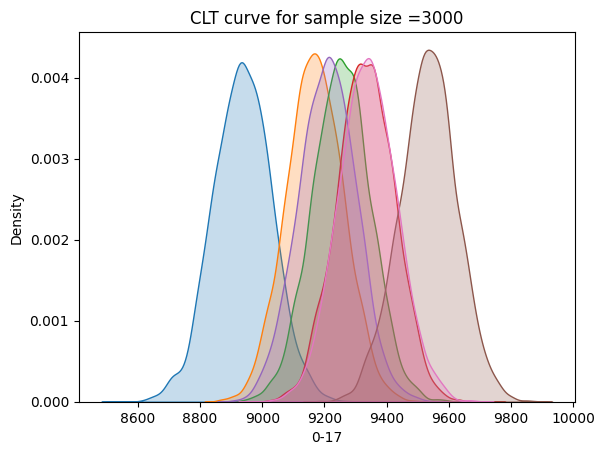

In [229]:
sns.kdeplot(df_3000['0-17'],label='0-17',shade=True)
sns.kdeplot(df_3000['18-25'],label='18-25',shade=True)
sns.kdeplot(df_3000['26-35'],label='26-35',shade=True)
sns.kdeplot(df_3000['36-45'],label='36-45',shade=True)
sns.kdeplot(df_3000['46-50'],label='46-50',shade=True)
sns.kdeplot(df_3000['51-55'],label='51-55',shade=True)
sns.kdeplot(df_3000['55+'],label='55+',shade=True)
plt.title('CLT curve for sample size =3000')


Confidence interval for 90%

In [230]:
percent  = 90
left_interval = (100 - percent)/2
right_interval = (100 + percent)/2

interval_age_17 = np.percentile(mean_0_17 , [left_interval , right_interval]).round(0)
interval_age_25 = np.percentile(mean_18_25 , [left_interval , right_interval]).round(0)
interval_age_35 = np.percentile(mean_26_35 , [left_interval , right_interval]).round(0)
interval_age_45 = np.percentile(mean_36_45 , [left_interval , right_interval]).round(0)
interval_age_50 = np.percentile(mean_46_50 , [left_interval , right_interval]).round(0)
interval_age_55 = np.percentile(mean_51_55 , [left_interval , right_interval]).round(0)
interval_age_56 = np.percentile(mean_55 , [left_interval , right_interval]).round(0)

print(f"90% Confidence Interval for people with age 0 - 17 and Sample Size 3000 is [{interval_age_17[0]} - {interval_age_17[1]}]")
print(f"Range = {interval_age_17[1] - interval_age_17[0]}")
print()
print(f"90% Confidence Interval for people with age 18 - 25 and Sample Size 3000 is [{interval_age_25[0]} - {interval_age_25[1]}]")
print(f"Range = {interval_age_25[1] - interval_age_25[0]}")
print()
print(f"90% Confidence Interval for people with age 26 - 35 and Sample Size 3000 is [{interval_age_35[0]} - {interval_age_35[1]}]")
print(f"Range = {interval_age_35[1] - interval_age_35[0]}")
print()
print(f"90% Confidence Interval for people with age 36 - 45 and Sample Size 3000 is [{interval_age_45[0]} - {interval_age_45[1]}]")
print(f"Range = {interval_age_45[1] - interval_age_45[0]}")
print()
print(f"90% Confidence Interval for people with age 46 - 50 and Sample Size 3000 is [{interval_age_50[0]} - {interval_age_50[1]}]")
print(f"Range = {interval_age_50[1] - interval_age_50[0]}")
print()
print(f"90% Confidence Interval for people with age 51 - 55 and Sample Size 3000 is [{interval_age_55[0]} - {interval_age_55[1]}]")
print(f"Range = {interval_age_55[1] - interval_age_55[0]}")
print()
print(f"90% Confidence Interval for people with age 55+ and Sample Size 3000 is [{interval_age_56[0]} - {interval_age_56[1]}]")
print(f"Range = {interval_age_56[1] - interval_age_56[0]}")

90% Confidence Interval for people with age 0 - 17 and Sample Size 3000 is [8784.0 - 9085.0]
Range = 301.0

90% Confidence Interval for people with age 18 - 25 and Sample Size 3000 is [9017.0 - 9321.0]
Range = 304.0

90% Confidence Interval for people with age 26 - 35 and Sample Size 3000 is [9100.0 - 9406.0]
Range = 306.0

90% Confidence Interval for people with age 36 - 45 and Sample Size 3000 is [9178.0 - 9481.0]
Range = 303.0

90% Confidence Interval for people with age 46 - 50 and Sample Size 3000 is [9056.0 - 9358.0]
Range = 302.0

90% Confidence Interval for people with age 51 - 55 and Sample Size 3000 is [9376.0 - 9683.0]
Range = 307.0

90% Confidence Interval for people with age 55+ and Sample Size 3000 is [9186.0 - 9493.0]
Range = 307.0


Confidence interval for 95%

In [231]:
percent  = 95
left_interval = (100 - percent)/2
right_interval = (100 + percent)/2

interval_age_17 = np.percentile(mean_0_17 , [left_interval , right_interval]).round(0)
interval_age_25 = np.percentile(mean_18_25 , [left_interval , right_interval]).round(0)
interval_age_35 = np.percentile(mean_26_35 , [left_interval , right_interval]).round(0)
interval_age_45 = np.percentile(mean_36_45 , [left_interval , right_interval]).round(0)
interval_age_50 = np.percentile(mean_46_50 , [left_interval , right_interval]).round(0)
interval_age_55 = np.percentile(mean_51_55 , [left_interval , right_interval]).round(0)
interval_age_56 = np.percentile(mean_55 , [left_interval , right_interval]).round(0)

print(f"95% Confidence Interval for people with age 0 - 17 and Sample Size 3000 is [{interval_age_17[0]} - {interval_age_17[1]}]")
print(f"Range = {interval_age_17[1] - interval_age_17[0]}")
print()
print(f"95% Confidence Interval for people with age 18 - 25 and Sample Size 3000 is [{interval_age_25[0]} - {interval_age_25[1]}]")
print(f"Range = {interval_age_25[1] - interval_age_25[0]}")
print()
print(f"95% Confidence Interval for people with age 26 - 35 and Sample Size 3000 is [{interval_age_35[0]} - {interval_age_35[1]}]")
print(f"Range = {interval_age_35[1] - interval_age_35[0]}")
print()
print(f"95% Confidence Interval for people with age 36 - 45 and Sample Size 3000 is [{interval_age_45[0]} - {interval_age_45[1]}]")
print(f"Range = {interval_age_45[1] - interval_age_45[0]}")
print()
print(f"95% Confidence Interval for people with age 46 - 50 and Sample Size 3000 is [{interval_age_50[0]} - {interval_age_50[1]}]")
print(f"Range = {interval_age_50[1] - interval_age_50[0]}")
print()
print(f"95% Confidence Interval for people with age 51 - 55 and Sample Size 3000 is [{interval_age_55[0]} - {interval_age_55[1]}]")
print(f"Range = {interval_age_55[1] - interval_age_55[0]}")
print()
print(f"95% Confidence Interval for people with age 55+ and Sample Size 3000 is [{interval_age_56[0]} - {interval_age_56[1]}]")
print(f"Range = {interval_age_56[1] - interval_age_56[0]}")

95% Confidence Interval for people with age 0 - 17 and Sample Size 3000 is [8749.0 - 9118.0]
Range = 369.0

95% Confidence Interval for people with age 18 - 25 and Sample Size 3000 is [8993.0 - 9348.0]
Range = 355.0

95% Confidence Interval for people with age 26 - 35 and Sample Size 3000 is [9071.0 - 9434.0]
Range = 363.0

95% Confidence Interval for people with age 36 - 45 and Sample Size 3000 is [9153.0 - 9507.0]
Range = 354.0

95% Confidence Interval for people with age 46 - 50 and Sample Size 3000 is [9026.0 - 9389.0]
Range = 363.0

95% Confidence Interval for people with age 51 - 55 and Sample Size 3000 is [9345.0 - 9713.0]
Range = 368.0

95% Confidence Interval for people with age 55+ and Sample Size 3000 is [9158.0 - 9524.0]
Range = 366.0


Confidence interval for 99%

In [232]:
percent  = 99
left_interval = (100 - percent)/2
right_interval = (100 + percent)/2

interval_age_17 = np.percentile(mean_0_17 , [left_interval , right_interval]).round(0)
interval_age_25 = np.percentile(mean_18_25 , [left_interval , right_interval]).round(0)
interval_age_35 = np.percentile(mean_26_35 , [left_interval , right_interval]).round(0)
interval_age_45 = np.percentile(mean_36_45 , [left_interval , right_interval]).round(0)
interval_age_50 = np.percentile(mean_46_50 , [left_interval , right_interval]).round(0)
interval_age_55 = np.percentile(mean_51_55 , [left_interval , right_interval]).round(0)
interval_age_56 = np.percentile(mean_55 , [left_interval , right_interval]).round(0)

print(f"99% Confidence Interval for people with age 0 - 17 and Sample Size 3000 is [{interval_age_17[0]} - {interval_age_17[1]}]")
print(f"Range = {interval_age_17[1] - interval_age_17[0]}")
print()
print(f"99% Confidence Interval for people with age 18 - 25 and Sample Size 3000 is [{interval_age_25[0]} - {interval_age_25[1]}]")
print(f"Range = {interval_age_25[1] - interval_age_25[0]}")
print()
print(f"99% Confidence Interval for people with age 26 - 35 and Sample Size 3000 is [{interval_age_35[0]} - {interval_age_35[1]}]")
print(f"Range = {interval_age_35[1] - interval_age_35[0]}")
print()
print(f"99% Confidence Interval for people with age 36 - 45 and Sample Size 3000 is [{interval_age_45[0]} - {interval_age_45[1]}]")
print(f"Range = {interval_age_45[1] - interval_age_45[0]}")
print()
print(f"99% Confidence Interval for people with age 46 - 50 and Sample Size 3000 is [{interval_age_50[0]} - {interval_age_50[1]}]")
print(f"Range = {interval_age_50[1] - interval_age_50[0]}")
print()
print(f"99% Confidence Interval for people with age 51 - 55 and Sample Size 3000 is [{interval_age_55[0]} - {interval_age_55[1]}]")
print(f"Range = {interval_age_55[1] - interval_age_55[0]}")
print()
print(f"99% Confidence Interval for people with age 55+ and Sample Size 3000 is [{interval_age_56[0]} - {interval_age_56[1]}]")
print(f"Range = {interval_age_56[1] - interval_age_56[0]}")

99% Confidence Interval for people with age 0 - 17 and Sample Size 3000 is [8687.0 - 9175.0]
Range = 488.0

99% Confidence Interval for people with age 18 - 25 and Sample Size 3000 is [8946.0 - 9408.0]
Range = 462.0

99% Confidence Interval for people with age 26 - 35 and Sample Size 3000 is [9015.0 - 9498.0]
Range = 483.0

99% Confidence Interval for people with age 36 - 45 and Sample Size 3000 is [9095.0 - 9562.0]
Range = 467.0

99% Confidence Interval for people with age 46 - 50 and Sample Size 3000 is [8980.0 - 9456.0]
Range = 476.0

99% Confidence Interval for people with age 51 - 55 and Sample Size 3000 is [9290.0 - 9768.0]
Range = 478.0

99% Confidence Interval for people with age 55+ and Sample Size 3000 is [9095.0 - 9583.0]
Range = 488.0


Sample size=30000

In [233]:
sample_size=30000

mean_0_17=[]
mean_18_25=[]
mean_26_35=[]
mean_36_45 = []
mean_46_50 = []
mean_51_55 = []
mean_55 = []

for i in range(5000):
  sample_17=np.random.choice(dt_0_17,sample_size)
  sample_25=np.random.choice(dt_18_25,sample_size)
  sample_35=np.random.choice(dt_26_35,sample_size)
  sample_45=np.random.choice(dt_36_45,sample_size)
  sample_50=np.random.choice(dt_46_50,sample_size)
  sample_55=np.random.choice(dt_51_55,sample_size)
  sample_56=np.random.choice(dt_55,sample_size)

  mean_0_17.append(np.mean(sample_17))
  mean_18_25.append(np.mean(sample_25))
  mean_26_35.append(np.mean(sample_35))
  mean_36_45.append(np.mean(sample_45))
  mean_46_50.append(np.mean(sample_50))
  mean_51_55.append(np.mean(sample_55))
  mean_55.append(np.mean(sample_56))

df_30000=pd.DataFrame({"0-17": mean_0_17,"18-25" : mean_18_25 ,"26-35" : mean_26_35 ,"36-45" : mean_36_45 ,"46-50" : mean_46_50 ,"51-55" : mean_51_55 ,"55+" : mean_55 ,})
df_30000.head()

,0-17,18-25,26-35,36-45,46-50,51-55,55+
0,8924.152600,9181.545633,9297.785367,9319.592900,9206.607900,9561.073867,9356.803233
1,8928.334733,9155.290400,9256.111167,9351.985267,9230.263767,9504.288167,9334.423333
2,8956.471700,9192.616967,9210.781300,9354.299533,9160.374033,9559.228200,9332.035900
3,8978.767467,9171.809700,9293.086267,9309.803300,9208.451167,9479.453133,9331.492667
4,8979.125900,9249.052100,9211.330467,9383.674667,9223.297500,9540.347067,9364.312833


/tmp/ipython-input-234-1495702505.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_30000['0-17'],label='0-17',shade=True)
/tmp/ipython-input-234-1495702505.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_30000['18-25'],label='18-25',shade=True)
/tmp/ipython-input-234-1495702505.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_30000['26-35'],label='26-35',shade=True)
/tmp/ipython-input-234-1495702505.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_30000['36-45'],label='36-45

Text(0.5, 1.0, 'CLT curve for sample size =30000')

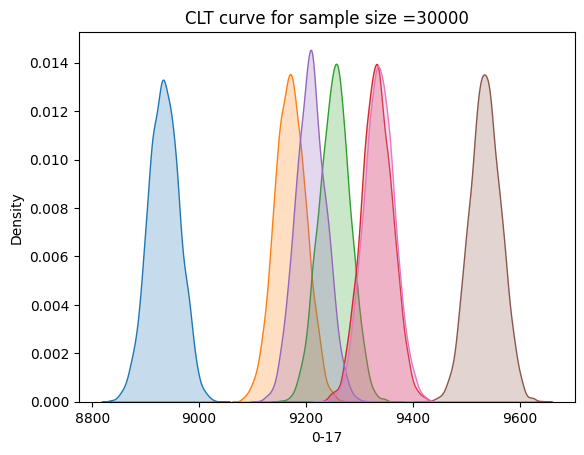

In [234]:
sns.kdeplot(df_30000['0-17'],label='0-17',shade=True)
sns.kdeplot(df_30000['18-25'],label='18-25',shade=True)
sns.kdeplot(df_30000['26-35'],label='26-35',shade=True)
sns.kdeplot(df_30000['36-45'],label='36-45',shade=True)
sns.kdeplot(df_30000['46-50'],label='46-50',shade=True)
sns.kdeplot(df_30000['51-55'],label='51-55',shade=True)
sns.kdeplot(df_30000['55+'],label='55+',shade=True)
plt.title('CLT curve for sample size =30000')

Confidence interval for 90%

In [235]:
percent  = 90
left_interval = (100 - percent)/2
right_interval = (100 + percent)/2

interval_age_17 = np.percentile(mean_0_17 , [left_interval , right_interval]).round(0)
interval_age_25 = np.percentile(mean_18_25 , [left_interval , right_interval]).round(0)
interval_age_35 = np.percentile(mean_26_35 , [left_interval , right_interval]).round(0)
interval_age_45 = np.percentile(mean_36_45 , [left_interval , right_interval]).round(0)
interval_age_50 = np.percentile(mean_46_50 , [left_interval , right_interval]).round(0)
interval_age_55 = np.percentile(mean_51_55 , [left_interval , right_interval]).round(0)
interval_age_56 = np.percentile(mean_55 , [left_interval , right_interval]).round(0)

print(f"90% Confidence Interval for people with age 0 - 17 and Sample Size 30000 is [{interval_age_17[0]} - {interval_age_17[1]}]")
print(f"Range = {interval_age_17[1] - interval_age_17[0]}")
print()
print(f"90% Confidence Interval for people with age 18 - 25 and Sample Size 30000 is [{interval_age_25[0]} - {interval_age_25[1]}]")
print(f"Range = {interval_age_25[1] - interval_age_25[0]}")
print()
print(f"90% Confidence Interval for people with age 26 - 35 and Sample Size 30000 is [{interval_age_35[0]} - {interval_age_35[1]}]")
print(f"Range = {interval_age_35[1] - interval_age_35[0]}")
print()
print(f"90% Confidence Interval for people with age 36 - 45 and Sample Size 30000 is [{interval_age_45[0]} - {interval_age_45[1]}]")
print(f"Range = {interval_age_45[1] - interval_age_45[0]}")
print()
print(f"90% Confidence Interval for people with age 46 - 50 and Sample Size 30000 is [{interval_age_50[0]} - {interval_age_50[1]}]")
print(f"Range = {interval_age_50[1] - interval_age_50[0]}")
print()
print(f"90% Confidence Interval for people with age 51 - 55 and Sample Size 30000 is [{interval_age_55[0]} - {interval_age_55[1]}]")
print(f"Range = {interval_age_55[1] - interval_age_55[0]}")
print()
print(f"90% Confidence Interval for people with age 55+ and Sample Size 30000 is [{interval_age_56[0]} - {interval_age_56[1]}]")
print(f"Range = {interval_age_56[1] - interval_age_56[0]}")

90% Confidence Interval for people with age 0 - 17 and Sample Size 30000 is [8886.0 - 8982.0]
Range = 96.0

90% Confidence Interval for people with age 18 - 25 and Sample Size 30000 is [9123.0 - 9219.0]
Range = 96.0

90% Confidence Interval for people with age 26 - 35 and Sample Size 30000 is [9206.0 - 9300.0]
Range = 94.0

90% Confidence Interval for people with age 36 - 45 and Sample Size 30000 is [9284.0 - 9379.0]
Range = 95.0

90% Confidence Interval for people with age 46 - 50 and Sample Size 30000 is [9162.0 - 9256.0]
Range = 94.0

90% Confidence Interval for people with age 51 - 55 and Sample Size 30000 is [9487.0 - 9582.0]
Range = 95.0

90% Confidence Interval for people with age 55+ and Sample Size 30000 is [9289.0 - 9384.0]
Range = 95.0


Confidence interval for 95%

In [236]:
percent  = 95
left_interval = (100 - percent)/2
right_interval = (100 + percent)/2

interval_age_17 = np.percentile(mean_0_17 , [left_interval , right_interval]).round(0)
interval_age_25 = np.percentile(mean_18_25 , [left_interval , right_interval]).round(0)
interval_age_35 = np.percentile(mean_26_35 , [left_interval , right_interval]).round(0)
interval_age_45 = np.percentile(mean_36_45 , [left_interval , right_interval]).round(0)
interval_age_50 = np.percentile(mean_46_50 , [left_interval , right_interval]).round(0)
interval_age_55 = np.percentile(mean_51_55 , [left_interval , right_interval]).round(0)
interval_age_56 = np.percentile(mean_55 , [left_interval , right_interval]).round(0)

print(f"95% Confidence Interval for people with age 0 - 17 and Sample Size 30000 is [{interval_age_17[0]} - {interval_age_17[1]}]")
print(f"Range = {interval_age_17[1] - interval_age_17[0]}")
print()
print(f"95% Confidence Interval for people with age 18 - 25 and Sample Size 30000 is [{interval_age_25[0]} - {interval_age_25[1]}]")
print(f"Range = {interval_age_25[1] - interval_age_25[0]}")
print()
print(f"95% Confidence Interval for people with age 26 - 35 and Sample Size 30000 is [{interval_age_35[0]} - {interval_age_35[1]}]")
print(f"Range = {interval_age_35[1] - interval_age_35[0]}")
print()
print(f"95% Confidence Interval for people with age 36 - 45 and Sample Size 30000 is [{interval_age_45[0]} - {interval_age_45[1]}]")
print(f"Range = {interval_age_45[1] - interval_age_45[0]}")
print()
print(f"95% Confidence Interval for people with age 46 - 50 and Sample Size 30000 is [{interval_age_50[0]} - {interval_age_50[1]}]")
print(f"Range = {interval_age_50[1] - interval_age_50[0]}")
print()
print(f"95% Confidence Interval for people with age 51 - 55 and Sample Size 30000 is [{interval_age_55[0]} - {interval_age_55[1]}]")
print(f"Range = {interval_age_55[1] - interval_age_55[0]}")
print()
print(f"95% Confidence Interval for people with age 55+ and Sample Size 30000 is [{interval_age_56[0]} - {interval_age_56[1]}]")
print(f"Range = {interval_age_56[1] - interval_age_56[0]}")

95% Confidence Interval for people with age 0 - 17 and Sample Size 30000 is [8876.0 - 8990.0]
Range = 114.0

95% Confidence Interval for people with age 18 - 25 and Sample Size 30000 is [9114.0 - 9227.0]
Range = 113.0

95% Confidence Interval for people with age 26 - 35 and Sample Size 30000 is [9196.0 - 9309.0]
Range = 113.0

95% Confidence Interval for people with age 36 - 45 and Sample Size 30000 is [9275.0 - 9389.0]
Range = 114.0

95% Confidence Interval for people with age 46 - 50 and Sample Size 30000 is [9153.0 - 9265.0]
Range = 112.0

95% Confidence Interval for people with age 51 - 55 and Sample Size 30000 is [9478.0 - 9591.0]
Range = 113.0

95% Confidence Interval for people with age 55+ and Sample Size 30000 is [9280.0 - 9393.0]
Range = 113.0


Confidence interval for 99%

In [237]:
percent  = 99
left_interval = (100 - percent)/2
right_interval = (100 + percent)/2

interval_age_17 = np.percentile(mean_0_17 , [left_interval , right_interval]).round(0)
interval_age_25 = np.percentile(mean_18_25 , [left_interval , right_interval]).round(0)
interval_age_35 = np.percentile(mean_26_35 , [left_interval , right_interval]).round(0)
interval_age_45 = np.percentile(mean_36_45 , [left_interval , right_interval]).round(0)
interval_age_50 = np.percentile(mean_46_50 , [left_interval , right_interval]).round(0)
interval_age_55 = np.percentile(mean_51_55 , [left_interval , right_interval]).round(0)
interval_age_56 = np.percentile(mean_55 , [left_interval , right_interval]).round(0)

print(f"99% Confidence Interval for people with age 0 - 17 and Sample Size 30000 is [{interval_age_17[0]} - {interval_age_17[1]}]")
print(f"Range = {interval_age_17[1] - interval_age_17[0]}")
print()
print(f"99% Confidence Interval for people with age 18 - 25 and Sample Size 30000 is [{interval_age_25[0]} - {interval_age_25[1]}]")
print(f"Range = {interval_age_25[1] - interval_age_25[0]}")
print()
print(f"99% Confidence Interval for people with age 26 - 35 and Sample Size 30000 is [{interval_age_35[0]} - {interval_age_35[1]}]")
print(f"Range = {interval_age_35[1] - interval_age_35[0]}")
print()
print(f"99% Confidence Interval for people with age 36 - 45 and Sample Size 30000 is [{interval_age_45[0]} - {interval_age_45[1]}]")
print(f"Range = {interval_age_45[1] - interval_age_45[0]}")
print()
print(f"99% Confidence Interval for people with age 46 - 50 and Sample Size 30000 is [{interval_age_50[0]} - {interval_age_50[1]}]")
print(f"Range = {interval_age_50[1] - interval_age_50[0]}")
print()
print(f"99% Confidence Interval for people with age 51 - 55 and Sample Size 30000 is [{interval_age_55[0]} - {interval_age_55[1]}]")
print(f"Range = {interval_age_55[1] - interval_age_55[0]}")
print()
print(f"99% Confidence Interval for people with age 55+ and Sample Size 30000 is [{interval_age_56[0]} - {interval_age_56[1]}]")
print(f"Range = {interval_age_56[1] - interval_age_56[0]}")

99% Confidence Interval for people with age 0 - 17 and Sample Size 30000 is [8859.0 - 9007.0]
Range = 148.0

99% Confidence Interval for people with age 18 - 25 and Sample Size 30000 is [9096.0 - 9246.0]
Range = 150.0

99% Confidence Interval for people with age 26 - 35 and Sample Size 30000 is [9180.0 - 9327.0]
Range = 147.0

99% Confidence Interval for people with age 36 - 45 and Sample Size 30000 is [9255.0 - 9408.0]
Range = 153.0

99% Confidence Interval for people with age 46 - 50 and Sample Size 30000 is [9137.0 - 9281.0]
Range = 144.0

99% Confidence Interval for people with age 51 - 55 and Sample Size 30000 is [9459.0 - 9605.0]
Range = 146.0

99% Confidence Interval for people with age 55+ and Sample Size 30000 is [9261.0 - 9410.0]
Range = 149.0


* As the size of the sample increases the confidence interval is becoming more clear and accurate. Hence, more the sample size more precise is the data.
From the above graphs its clear that some age groups have overlapping CLT curve whereas some dont.

* Age 0 - 17 had the least spending.

* Age 18 - 25, 26 - 35, 46 - 50 have almost the same overlapping curve hence they have almost similar purchase characteristics.

* Age 36 - 45, 55+ have a overlapping curve thereby indicating that they have a very similar purchase characteristics.

* Age 51 - 55 has the highest purchase among all the other age groups.

RECOMMENDATIONS :

As Male customers contributed to majority if the sale compare to Female , Walmart should provide offers in a way which retains the Male customers as well concentrate in increasing the female customers too.

The customers in age group 0 - 17 had very less purchase hence Walmart can provide more coupon , sales and offers on the suited products to increase the purchase.

Walmart can offer pre sales or more offers to the products preferred by the age group 51 - 55 as they had the maximum amount per purchase.

The product categories 5, 1, 8 are sold the most hence Walmart can have huge stock of products from these categories to avoid late deliveries or other related issues.

Post sale Walmart can provide deals or cupons and send emails regarding the existing deals or offers to attract the customers thereby having them intact.